In [38]:
import pandas as pd
import pandas_datareader.data as reader
import requests
import datetime as dt
import numpy as np
from scipy.stats import percentileofscore as score
from statistics import mean
from math import floor
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.stats import norm
import yfinance as yf
import datetime
import time

In [39]:
# La libreria request sirve para hacer peticiones http (GET o POST), En este caso el proposito es extraer 
# los nombres de las emisoras que componen el INPC
import pandas as pd
import requests
url_link = 'https://finance.yahoo.com/quote/%5EIXIC/components?p=%5EIXIC'
r = requests.get(url_link,headers ={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'})
table = pd.read_html(r.text)
print(table)

[   Symbol                         Company Name  Last Price  Change % Change  \
0    SLAC   Social Leverage Acquisition Corp I       9.980 -0.0200   -0.20%   
1    NVCT                Nuvectis Pharma, Inc.       9.970 -0.0200   -0.20%   
2    FNLC              The First Bancorp, Inc.      29.940  0.0700   +0.23%   
3    CVCY     Central Valley Community Bancorp      25.950  0.0800   +0.31%   
4    CMRA  Comera Life Sciences Holdings, Inc.       1.285 -0.0050   -0.39%   
5    BSBK               Bogota Financial Corp.      11.220 -0.0500   -0.44%   
6    NVCN                         Neovasc Inc.      28.640  0.1400   +0.49%   
7    NMRK                  Newmark Group, Inc.       8.460 -0.0500   -0.59%   
8    NVEC                      NVE Corporation      75.540 -0.5300   -0.70%   
9    AGNC                AGNC Investment Corp.      11.390 -0.0800   -0.70%   
10   NVEI                    Nuvei Corporation      32.860 -0.2500   -0.76%   
11   CVCO               Cavco Industries, Inc.     

In [40]:
# Solamente nos interesa la primera columna ya que queremos los nombres de las emisoras, .tolist() genera una lista
# de aquellas instancias que se encuentran en la columna especificada
tickers = table[0].Symbol.tolist()
tickers

['SLAC',
 'NVCT',
 'FNLC',
 'CVCY',
 'CMRA',
 'BSBK',
 'NVCN',
 'NMRK',
 'NVEC',
 'AGNC',
 'NVEI',
 'CVCO',
 'STRT',
 'CMRX',
 'TWST',
 'FNKO',
 'SCOR',
 'NVCR',
 'STRR',
 'CEAD',
 'OPTN',
 'SEV',
 'AXON',
 'SLAB',
 'IFRX',
 'KLXE',
 'AGLE',
 'STRS',
 'NMRD',
 'SDC']

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.stats import norm
import yfinance as yf
import datetime
import time

# GS,HD, DE, AMXL.MX

style.use('seaborn')

#importing data
# tickers = ['CVX', 'GS', 'HD', 'MSFT','DE', 'BBQ', 'NMRK', 'ALSEA.MX', 'AC.MX', 'AMXL.MX', 'BIMBOA.MX', 'BBAJIOO.MX', 'BA','MFRISCOA-1.MX','BAX','CNP']
# ticker = 'CVX', 'GS', 'HD', 'MSFT','DE', 'BBQ', 'NMRK', 'ALSEA.MX', 'AC.MX', 'AMXL.MX', 'BIMBOA.MX', 'BBAJIOO.MX', 'BA','MFRISCOA-1.MX','BAX','CNP'
start = '2020-12-31'
end = datetime.datetime.now().date().isoformat()         # today
prices_df = yf.download(' '.join(tickers), start, end)['Adj Close']
returns_df = prices_df.pct_change()[1:]

[*********************100%***********************]  30 of 30 completed


In [42]:
prices_df=pd.DataFrame(prices_df)
prices_df

AGLE       AGNC        AXON   BSBK   CEAD    CMRA  CMRX  \
Date                                                                   
2020-12-31  7.870  12.428871  122.529999   8.91  5.250  10.300  4.83   
2021-01-04  8.560  12.261559  116.849998   8.85  4.800  10.280  4.76   
2021-01-05  8.000  12.197822  122.300003   9.05  4.950  10.450  4.92   
2021-01-06  7.860  12.245625  121.690002   9.26  6.000  10.200  4.76   
2021-01-07  7.990  12.293427  124.570000   9.12  6.600  10.190  4.98   
...           ...        ...         ...    ...    ...     ...   ...   
2023-02-13  0.520  11.440000  190.320007  11.45  0.978   1.280  1.73   
2023-02-14  0.480  11.410000  193.899994  11.32  0.950   1.300  1.70   
2023-02-15  0.475  11.480000  198.990005  11.35  0.970   1.330  1.68   
2023-02-16  0.470  11.470000  196.050003  11.27  0.933   1.290  1.63   
2023-02-17  0.499  11.390000  189.259995  11.27  0.960   1.285  1.65   

                  CVCO       CVCY   FNKO  ...  OPTN  SCOR     SDC    SEV  \
Date                                      ...                              
2020-12-31  175.449997  14.110817  10.38  ...  4.14  2.49  11.940    NaN   
2021-01-04  174.360001  14.196105  10.05  ...  4.25  2.39  11.680    NaN   
2021-01-05  179.000000  14.262442  10.33  ...  4.21  2.42  11.580    NaN   
2021-01-06  188.419998  15.295404  10.70  ...  4.26  2.45  11.160    NaN   
2021-01-07  193.149994  15.352264  10.73  ...  4.30  2.84  11.630    NaN   
...                ...        ...    ...  ...   ...   ...     ...    ...   
2023-02-13  291.019989  25.840000  10.75  ...  1.65  1.20   0.579  0.910   
2023-02-14  287.649994  25.750000  10.80  ...  1.63  1.26   0.590  0.905   
2023-02-15  290.820007  25.790001  11.33  ...  1.72  1.27   0.641  0.905   
2023-02-16  287.450012  25.870001  11.29  ...  1.70  1.23   0.640  0.880   
2023-02-17  284.829987  25.950001  11.46  ...  1.75  1.21   0.590  0.850   

                  SLAB    SLAC  STRR       STRS       STRT        TWST  
Date                                                                    
2020-12-31  127.339996     NaN  3.59  22.184715  49.360001  141.289993  
2021-01-04  126.349998     NaN  3.09  21.018930  47.750000  132.929993  
2021-01-05  127.970001     NaN  2.92  20.871033  48.750000  138.500000  
2021-01-06  132.880005     NaN  2.92  21.227728  50.599998  143.419998  
2021-01-07  135.259995     NaN  2.96  22.393513  50.029999  156.970001  
...                ...     ...   ...        ...        ...         ...  
2023-02-13  188.750000  10.170  0.83  21.129999  21.340000   23.950001  
2023-02-14  192.979996  10.037  0.85  20.809999  20.030001   24.270000  
2023-02-15  188.449997  10.005  0.88  21.360001  20.200001   24.129999  
2023-02-16  186.029999  10.000  0.86  21.980000  21.200001   22.809999  
2023-02-17  179.320007   9.980  0.86  22.900000  21.400000   22.520000  

[537 rows x 30 columns]

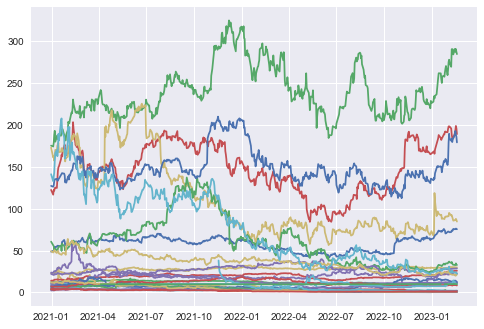

In [43]:
# Visualizamos la data a tarves del tiempo
plt.figure()
plt.plot(prices_df)
plt.show()

In [44]:
df_week = prices_df.groupby(pd.PeriodIndex(prices_df.index, freq='W')).mean()
#df_week = df_week[['Adj Close']]
df_week.head()

AGLE       AGNC        AXON    BSBK     CEAD    CMRA  \
Date                                                                            
2020-12-28/2021-01-03  7.8700  12.428871  122.529999  8.9100   5.2500  10.300   
2021-01-04/2021-01-10  8.1180  12.275900  122.154001  9.0800   5.8800  10.274   
2021-01-11/2021-01-17  8.0040  12.385849  141.101999  9.0620  14.7300  10.276   
2021-01-18/2021-01-24  7.6675  12.731626  164.179996  8.9425  15.0375  10.265   
2021-01-25/2021-01-31  7.1360  12.725350  169.871997  9.0540  14.1000  10.310   

                         CMRX        CVCO       CVCY     FNKO  ...   OPTN  \
Date                                                           ...          
2020-12-28/2021-01-03  4.8300  175.449997  14.110817  10.3800  ...  4.140   
2021-01-04/2021-01-10  5.5680  183.013998  14.886010  10.4660  ...  4.260   
2021-01-11/2021-01-17  8.2600  186.334000  15.484938  11.5120  ...  4.308   
2021-01-18/2021-01-24  8.9625  192.727501  15.304881  11.6325  ...  4.095   
2021-01-25/2021-01-31  8.8160  185.192001  14.755232  12.1740  ...  4.168   

                        SCOR       SDC  SEV        SLAB  SLAC   STRR  \
Date                                                                   
2020-12-28/2021-01-03  2.490  11.94000  NaN  127.339996   NaN  3.590   
2021-01-04/2021-01-10  2.678  11.68000  NaN  131.552000   NaN  2.976   
2021-01-11/2021-01-17  3.396  12.03200  NaN  134.906003   NaN  3.398   
2021-01-18/2021-01-24  3.370  11.09125  NaN  141.830002   NaN  3.685   
2021-01-25/2021-01-31  3.264  13.96800  NaN  135.716000   NaN  3.578   

                            STRS       STRT        TWST  
Date                                                     
2020-12-28/2021-01-03  22.184715  49.360001  141.289993  
2021-01-04/2021-01-10  21.429565  49.171999  147.665997  
2021-01-11/2021-01-17  22.769348  48.190000  174.467999  
2021-01-18/2021-01-24  21.743197  45.962500  199.657501  
2021-01-25/2021-01-31  22.645810  47.957999  168.627997  

[5 rows x 30 columns]

In [45]:
l=len(df_week.columns)
l

30

In [46]:
df_week=df_week.dropna(axis=1)
df_week.head()

AGLE       AGNC        AXON    BSBK     CEAD    CMRA  \
Date                                                                            
2020-12-28/2021-01-03  7.8700  12.428871  122.529999  8.9100   5.2500  10.300   
2021-01-04/2021-01-10  8.1180  12.275900  122.154001  9.0800   5.8800  10.274   
2021-01-11/2021-01-17  8.0040  12.385849  141.101999  9.0620  14.7300  10.276   
2021-01-18/2021-01-24  7.6675  12.731626  164.179996  8.9425  15.0375  10.265   
2021-01-25/2021-01-31  7.1360  12.725350  169.871997  9.0540  14.1000  10.310   

                         CMRX        CVCO       CVCY     FNKO  ...       NVEC  \
Date                                                           ...              
2020-12-28/2021-01-03  4.8300  175.449997  14.110817  10.3800  ...  48.722645   
2021-01-04/2021-01-10  5.5680  183.013998  14.886010  10.4660  ...  52.606229   
2021-01-11/2021-01-17  8.2600  186.334000  15.484938  11.5120  ...  55.391868   
2021-01-18/2021-01-24  8.9625  192.727501  15.304881  11.6325  ...  58.160588   
2021-01-25/2021-01-31  8.8160  185.192001  14.755232  12.1740  ...  58.877454   

                            NVEI   OPTN   SCOR       SDC        SLAB   STRR  \
Date                                                                          
2020-12-28/2021-01-03  60.721001  4.140  2.490  11.94000  127.339996  3.590   
2021-01-04/2021-01-10  53.132201  4.260  2.678  11.68000  131.552000  2.976   
2021-01-11/2021-01-17  52.432001  4.308  3.396  12.03200  134.906003  3.398   
2021-01-18/2021-01-24  55.240750  4.095  3.370  11.09125  141.830002  3.685   
2021-01-25/2021-01-31  52.413000  4.168  3.264  13.96800  135.716000  3.578   

                            STRS       STRT        TWST  
Date                                                     
2020-12-28/2021-01-03  22.184715  49.360001  141.289993  
2021-01-04/2021-01-10  21.429565  49.171999  147.665997  
2021-01-11/2021-01-17  22.769348  48.190000  174.467999  
2021-01-18/2021-01-24  21.743197  45.962500  199.657501  
2021-01-25/2021-01-31  22.645810  47.957999  168.627997  

[5 rows x 27 columns]

AGLE       AGNC        AXON      BSBK    CEAD  \
Date                                                                    
2021-07-05/2021-07-11  7.115  13.908727  177.119995  10.17525   9.225   
2021-07-12/2021-07-18  6.976  13.570463  177.379999  10.17000   9.030   
2021-07-19/2021-07-25  6.740  13.437485  180.257999  10.11200   8.670   
2021-07-26/2021-08-01  6.438  13.427547  184.221997  10.15400  10.380   
2021-08-02/2021-08-08  6.478  13.290348  190.832001  10.35000  11.250   

                          CMRA    CMRX        CVCO       CVCY       FNKO  ...  \
Date                                                                      ...   
2021-07-05/2021-07-11  10.0200  7.7525  219.789997  19.171806  20.282500  ...   
2021-07-12/2021-07-18  10.0360  7.3620  211.419998  20.104955  18.840000  ...   
2021-07-19/2021-07-25  10.0418  7.4440  216.688004  20.523529  17.950000  ...   
2021-07-26/2021-08-01  10.0220  6.9800  231.779999  21.258911  18.759999  ...   
2021-08-02/2021-08-08  10.0280  6.6900  240.435999  21.703418  19.448000  ...   

                       week NVEC  week NVEI  week OPTN  week SCOR  week SDC  \
Date                                                                          
2021-07-05/2021-07-11   0.018001   0.024794  -0.078355  -0.074980 -0.102867   
2021-07-12/2021-07-18   0.012854  -0.030010   0.007506  -0.075871 -0.083214   
2021-07-19/2021-07-25   0.004331  -0.028281  -0.043772  -0.023811 -0.014615   
2021-07-26/2021-08-01   0.015229   0.058412  -0.034686  -0.025874 -0.024070   
2021-08-02/2021-08-08  -0.050455  -0.012354   0.017493  -0.025546  0.008088   

                       week SLAB  week STRR  week STRS  week STRT  week TWST  
Date                                                                          
2021-07-05/2021-07-11  -0.018836   0.054997   0.044440  -0.043068  -0.032214  
2021-07-12/2021-07-18  -0.023876   0.020777   0.036788  -0.023777  -0.089327  
2021-07-19/2021-07-25  -0.012677   0.074461   0.046169  -0.046215   0.027945  
2021-07-26/2021-08-01  -0.005995   0.066080   0.062256   0.020244  -0.023179  
2021-08-02/2021-08-08   0.089353  -0.095794  -0.028535  -0.005651   0.012138  

[5 rows x 54 columns]

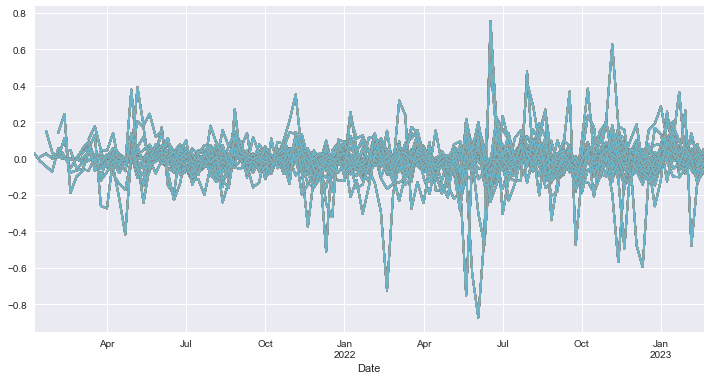

In [47]:
for i in range(len(df_week.columns)):
    idem=df_week.columns.__getitem__(i)
    x='week {}'.format(idem)
    df_week[x]=np.log(df_week.iloc[:,i]).diff()
    # drop null rows
    df_week.dropna(inplace=True)
    for m in range(l):
        df_week[x].plot(kind='line', figsize=(12, 6));
df_week.head()

In [48]:
udiff=df_week.iloc[:, 27:]
udiff

week AGLE  week AGNC  week AXON  week BSBK  week CEAD  \
Date                                                                           
2021-07-05/2021-07-11  -0.004068  -0.012412   0.013128  -0.001841  -0.020918   
2021-07-12/2021-07-18  -0.019730  -0.024621   0.001467  -0.000516  -0.021365   
2021-07-19/2021-07-25  -0.034416  -0.009847   0.016095  -0.005719  -0.040684   
2021-07-26/2021-08-01  -0.045842  -0.000740   0.021752   0.004145   0.180012   
2021-08-02/2021-08-08   0.006194  -0.010270   0.035252   0.019119   0.080487   
...                          ...        ...        ...        ...        ...   
2023-01-16/2023-01-22   0.053517   0.022553   0.010223  -0.000711   0.038963   
2023-01-23/2023-01-29  -0.083781   0.014020   0.036566   0.002944  -0.031765   
2023-01-30/2023-02-05  -0.019747   0.032461   0.028917  -0.010781   0.053852   
2023-02-06/2023-02-12   0.079761  -0.019535  -0.045979  -0.000350   0.002715   
2023-02-13/2023-02-19  -0.085066  -0.010437   0.032136  -0.009136  -0.074972   

                       week CMRA  week CMRX  week CVCO  week CVCY  week FNKO  \
Date                                                                           
2021-07-05/2021-07-11  -0.001017  -0.040386  -0.022708  -0.018063  -0.051200   
2021-07-12/2021-07-18   0.001595  -0.051684  -0.038826   0.047526  -0.073776   
2021-07-19/2021-07-25   0.000578   0.011077   0.024612   0.020606  -0.048392   
2021-07-26/2021-08-01  -0.001974  -0.064359   0.067330   0.035204   0.044137   
2021-08-02/2021-08-08   0.000599  -0.042435   0.036665   0.020694   0.036017   
...                          ...        ...        ...        ...        ...   
2023-01-16/2023-01-22  -0.093934  -0.063201   0.025686   0.006562   0.021375   
2023-01-23/2023-01-29  -0.067793  -0.040376   0.027927   0.018533   0.023498   
2023-01-30/2023-02-05  -0.036634   0.004444   0.026524   0.124059  -0.013671   
2023-02-06/2023-02-12  -0.028000  -0.013393   0.051854   0.013864  -0.076552   
2023-02-13/2023-02-19  -0.004615  -0.059011   0.011545   0.015297   0.008122   

                       ...  week NVEC  week NVEI  week OPTN  week SCOR  \
Date                   ...                                               
2021-07-05/2021-07-11  ...   0.018001   0.024794  -0.078355  -0.074980   
2021-07-12/2021-07-18  ...   0.012854  -0.030010   0.007506  -0.075871   
2021-07-19/2021-07-25  ...   0.004331  -0.028281  -0.043772  -0.023811   
2021-07-26/2021-08-01  ...   0.015229   0.058412  -0.034686  -0.025874   
2021-08-02/2021-08-08  ...  -0.050455  -0.012354   0.017493  -0.025546   
...                    ...        ...        ...        ...        ...   
2023-01-16/2023-01-22  ...   0.016200   0.037310  -0.025115  -0.042685   
2023-01-23/2023-01-29  ...   0.001512   0.060050  -0.002315  -0.060437   
2023-01-30/2023-02-05  ...  -0.010456   0.050739   0.031930   0.004781   
2023-02-06/2023-02-12  ...   0.022130  -0.035193  -0.044758  -0.009585   
2023-02-13/2023-02-19  ...   0.024160  -0.039537  -0.008250  -0.009677   

                       week SDC  week SLAB  week STRR  week STRS  week STRT  \
Date                                                                          
2021-07-05/2021-07-11 -0.102867  -0.018836   0.054997   0.044440  -0.043068   
2021-07-12/2021-07-18 -0.083214  -0.023876   0.020777   0.036788  -0.023777   
2021-07-19/2021-07-25 -0.014615  -0.012677   0.074461   0.046169  -0.046215   
2021-07-26/2021-08-01 -0.024070  -0.005995   0.066080   0.062256   0.020244   
2021-08-02/2021-08-08  0.008088   0.089353  -0.095794  -0.028535  -0.005651   
...                         ...        ...        ...        ...        ...   
2023-01-16/2023-01-22  0.097502  -0.012881  -0.023717   0.040350  -0.033022   
2023-01-23/2023-01-29 -0.003897   0.061462  -0.036387   0.042182   0.064842   
2023-01-30/2023-02-05  0.138197   0.089541   0.006615  -0.020926   0.015049   
2023-02-06/2023-02-12 -0.005393   0.057452  -0.028988   0.028853  -0.139191   
2023-02-13/2023-02-19 -0.03363

In [49]:
udiff.index=udiff.index.astype(str)

# Generaremos una prueba de estacionaridad de las primeras diferencias

In [50]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [51]:
rolmean = udiff.rolling(20).mean()
rolstd = udiff.rolling(20).std()
print(rolmean)

                       week AGLE  week AGNC  week AXON  week BSBK  week CEAD  \
Date                                                                           
2021-07-05/2021-07-11        NaN        NaN        NaN        NaN        NaN   
2021-07-12/2021-07-18        NaN        NaN        NaN        NaN        NaN   
2021-07-19/2021-07-25        NaN        NaN        NaN        NaN        NaN   
2021-07-26/2021-08-01        NaN        NaN        NaN        NaN        NaN   
2021-08-02/2021-08-08        NaN        NaN        NaN        NaN        NaN   
...                          ...        ...        ...        ...        ...   
2023-01-16/2023-01-22   0.000405   0.000180   0.022558   0.002253  -0.010704   
2023-01-23/2023-01-29   0.000622   0.001032   0.022325   0.002398  -0.009754   
2023-01-30/2023-02-05  -0.000707   0.004469   0.024464   0.001698  -0.007388   
2023-02-06/2023-02-12   0.004871   0.005902   0.024320   0.001685  -0.003424   
2023-02-13/2023-02-19   0.000763   0.014

week AGLE


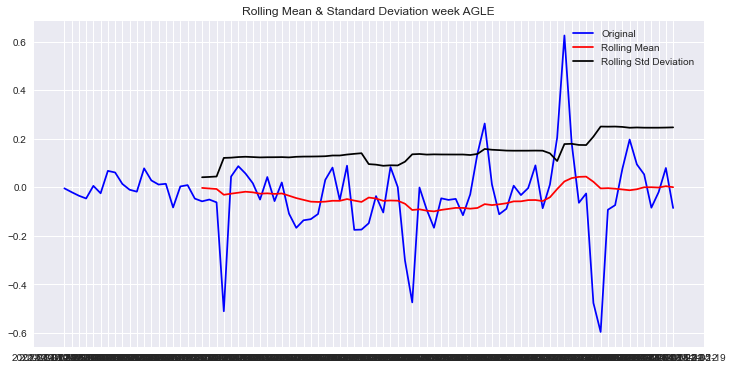

Test Statistic                 -5.404079
p-value                         0.000003
#Lags Used                      3.000000
Number of Observations Used    81.000000
Critical Value (1%)            -3.513790
Critical Value (5%)            -2.897943
Critical Value (10%)           -2.586191
dtype: float64


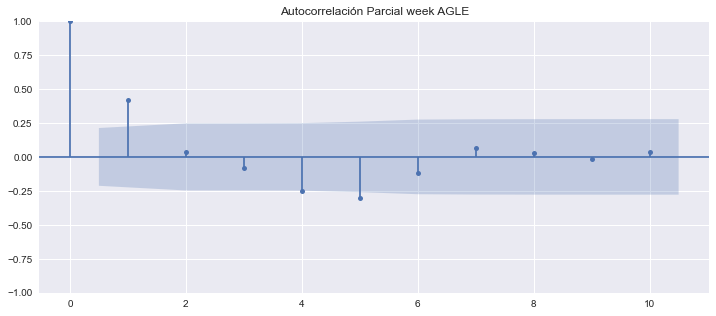

week AGNC


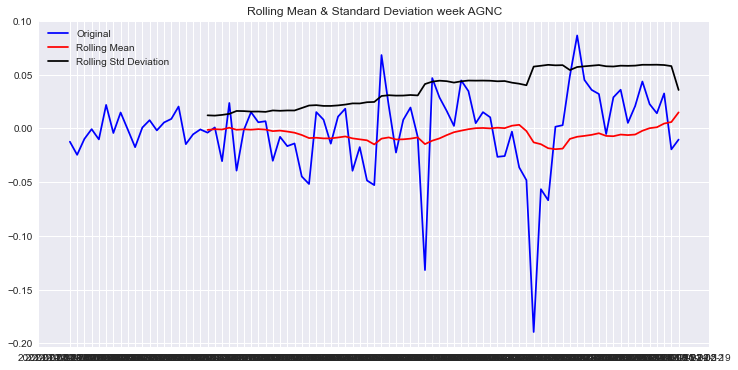

Test Statistic                -6.378664e+00
p-value                        2.250606e-08
#Lags Used                     0.000000e+00
Number of Observations Used    8.400000e+01
Critical Value (1%)           -3.510712e+00
Critical Value (5%)           -2.896616e+00
Critical Value (10%)          -2.585482e+00
dtype: float64


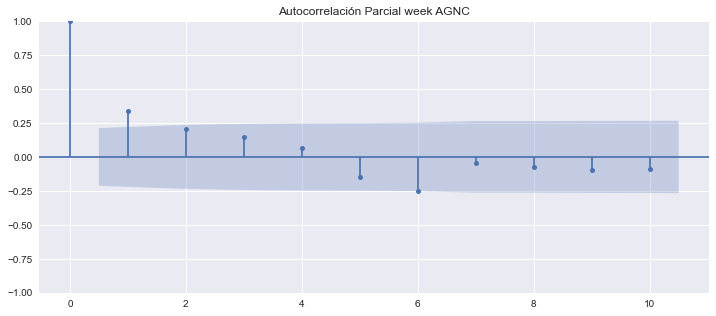

week AXON


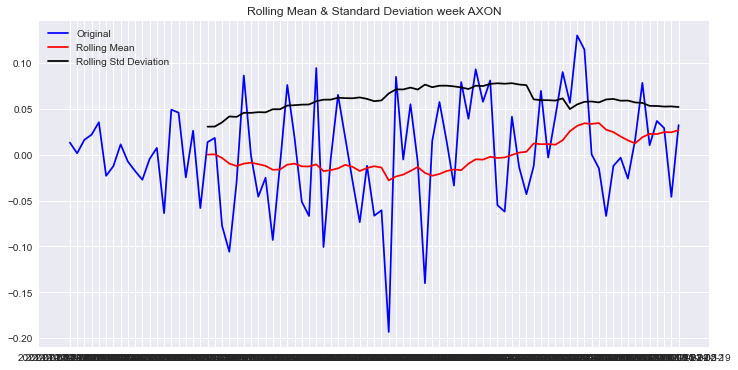

Test Statistic                -7.798789e+00
p-value                        7.590918e-12
#Lags Used                     0.000000e+00
Number of Observations Used    8.400000e+01
Critical Value (1%)           -3.510712e+00
Critical Value (5%)           -2.896616e+00
Critical Value (10%)          -2.585482e+00
dtype: float64


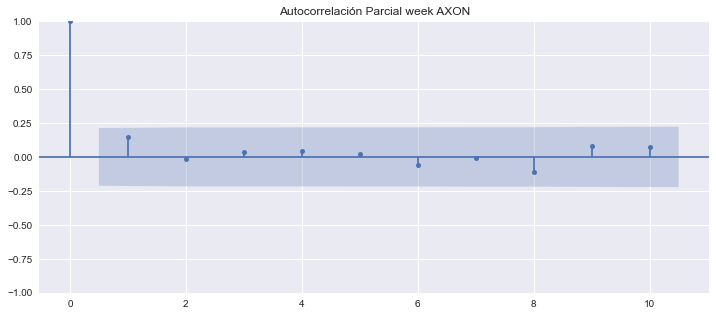

week BSBK


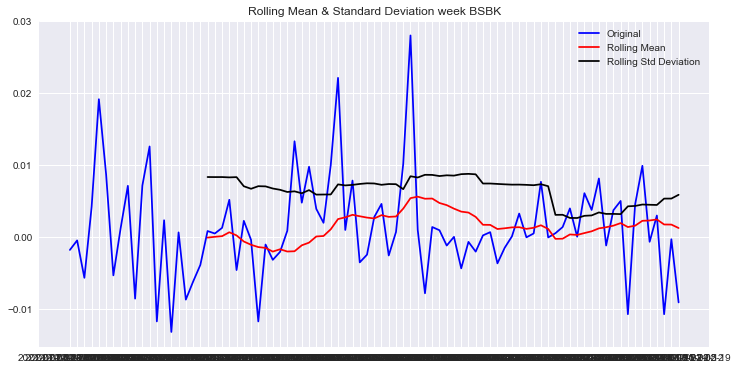

Test Statistic                -7.795600e+00
p-value                        7.732976e-12
#Lags Used                     0.000000e+00
Number of Observations Used    8.400000e+01
Critical Value (1%)           -3.510712e+00
Critical Value (5%)           -2.896616e+00
Critical Value (10%)          -2.585482e+00
dtype: float64


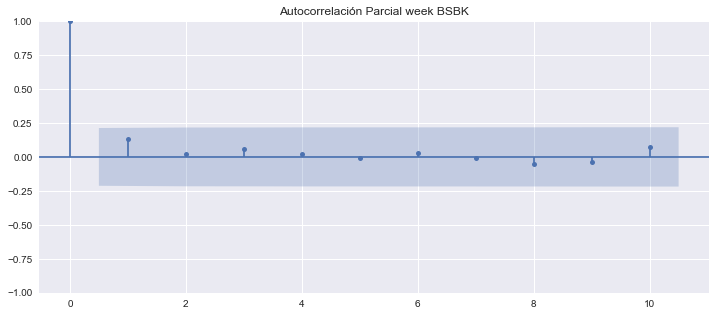

week CEAD


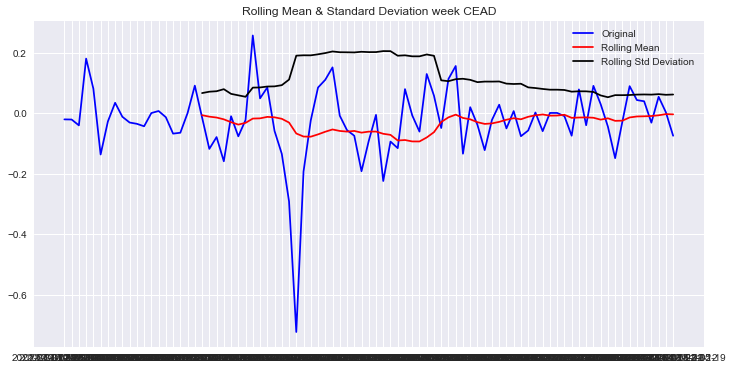

Test Statistic                -5.724519e+00
p-value                        6.819908e-07
#Lags Used                     3.000000e+00
Number of Observations Used    8.100000e+01
Critical Value (1%)           -3.513790e+00
Critical Value (5%)           -2.897943e+00
Critical Value (10%)          -2.586191e+00
dtype: float64


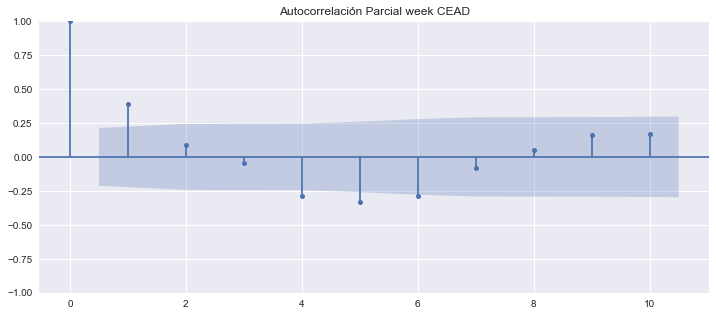

week CMRA


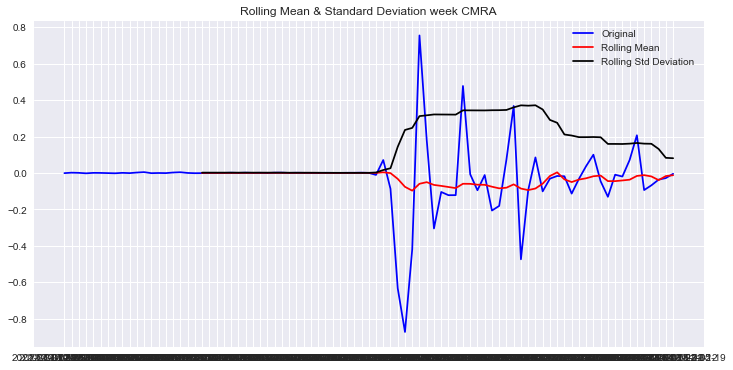

Test Statistic                -8.676598e+00
p-value                        4.399141e-14
#Lags Used                     1.000000e+00
Number of Observations Used    8.300000e+01
Critical Value (1%)           -3.511712e+00
Critical Value (5%)           -2.897048e+00
Critical Value (10%)          -2.585713e+00
dtype: float64


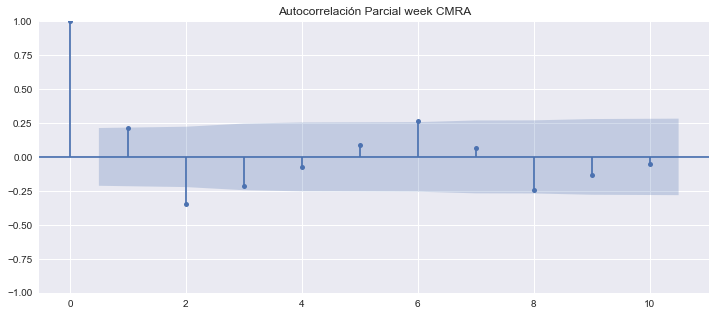

week CMRX


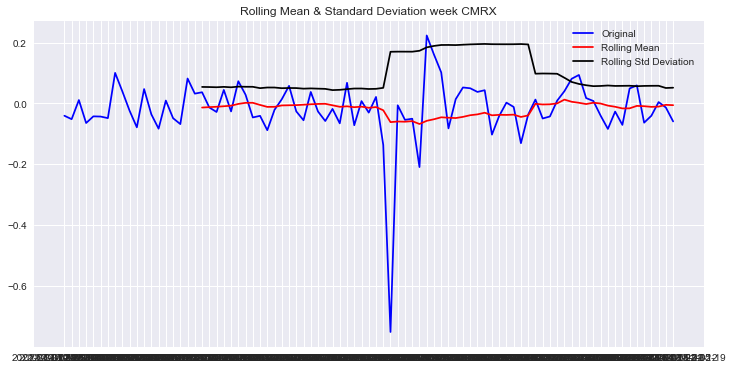

Test Statistic                -7.925290e+00
p-value                        3.632494e-12
#Lags Used                     0.000000e+00
Number of Observations Used    8.400000e+01
Critical Value (1%)           -3.510712e+00
Critical Value (5%)           -2.896616e+00
Critical Value (10%)          -2.585482e+00
dtype: float64


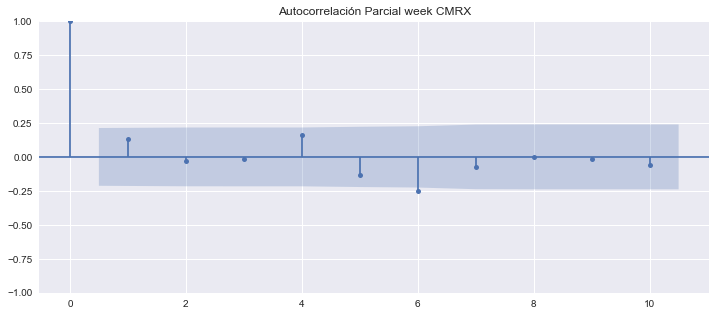

week CVCO


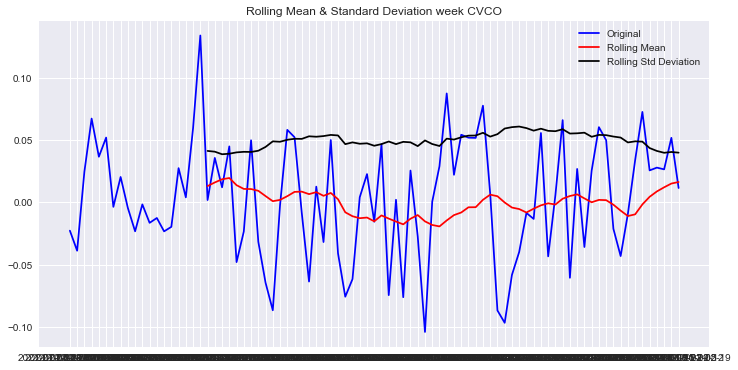

Test Statistic                -6.772051e+00
p-value                        2.626739e-09
#Lags Used                     0.000000e+00
Number of Observations Used    8.400000e+01
Critical Value (1%)           -3.510712e+00
Critical Value (5%)           -2.896616e+00
Critical Value (10%)          -2.585482e+00
dtype: float64


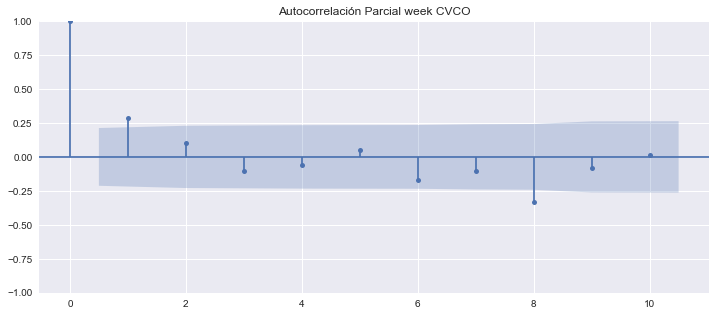

week CVCY


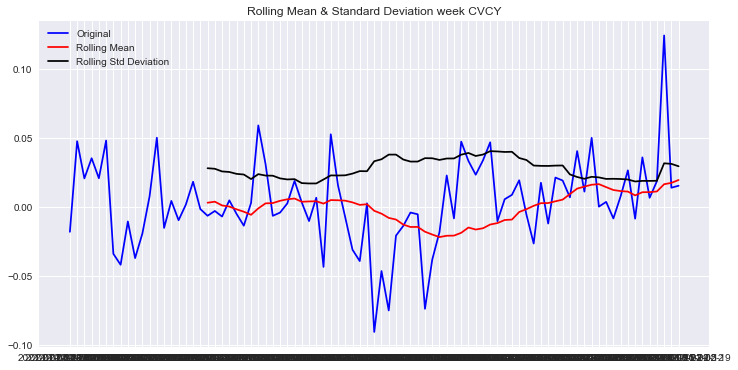

Test Statistic                 -4.265882
p-value                         0.000509
#Lags Used                      1.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


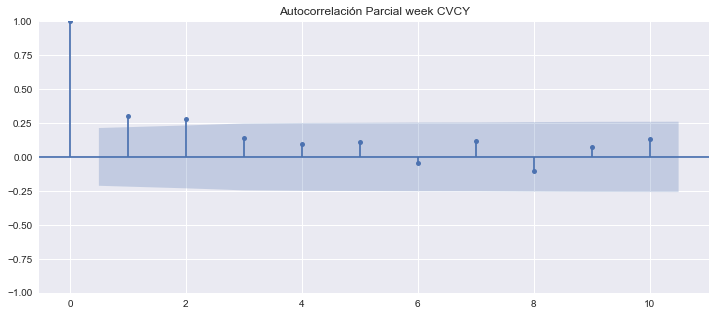

week FNKO


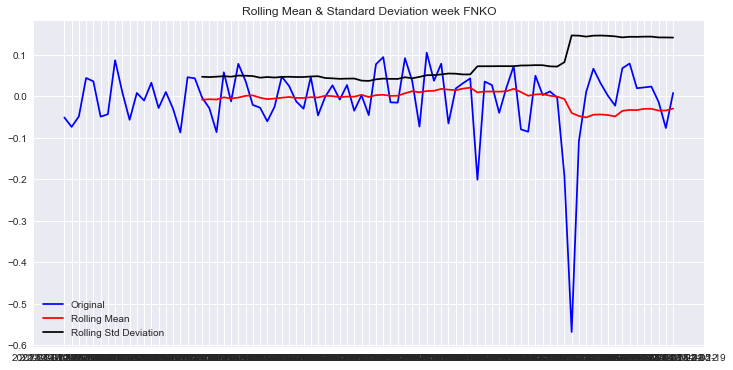

Test Statistic                -6.988046e+00
p-value                        7.875133e-10
#Lags Used                     0.000000e+00
Number of Observations Used    8.400000e+01
Critical Value (1%)           -3.510712e+00
Critical Value (5%)           -2.896616e+00
Critical Value (10%)          -2.585482e+00
dtype: float64


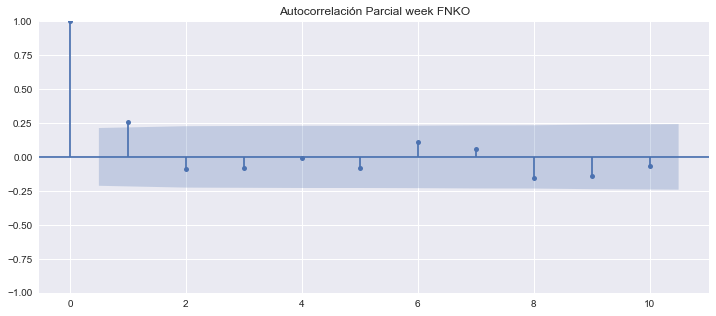

week FNLC


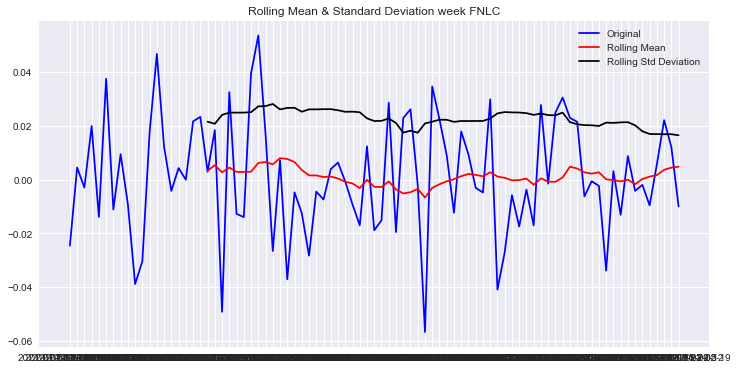

Test Statistic                -9.052062e+00
p-value                        4.810174e-15
#Lags Used                     0.000000e+00
Number of Observations Used    8.400000e+01
Critical Value (1%)           -3.510712e+00
Critical Value (5%)           -2.896616e+00
Critical Value (10%)          -2.585482e+00
dtype: float64


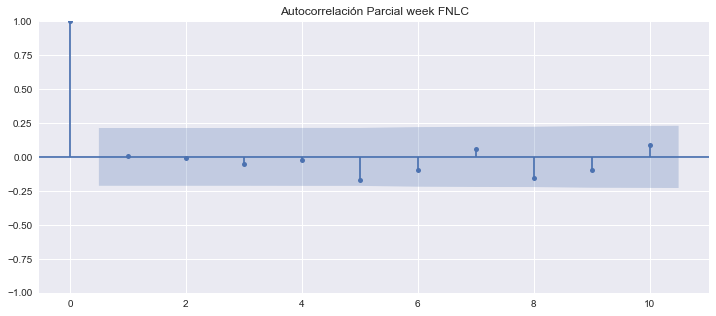

week IFRX


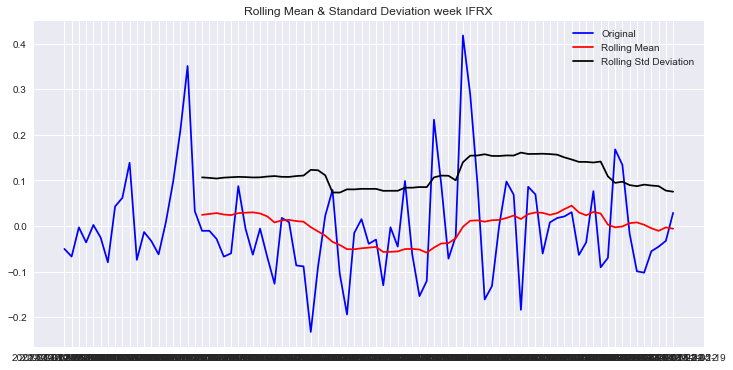

Test Statistic                -7.235758e+00
p-value                        1.941556e-10
#Lags Used                     1.000000e+00
Number of Observations Used    8.300000e+01
Critical Value (1%)           -3.511712e+00
Critical Value (5%)           -2.897048e+00
Critical Value (10%)          -2.585713e+00
dtype: float64


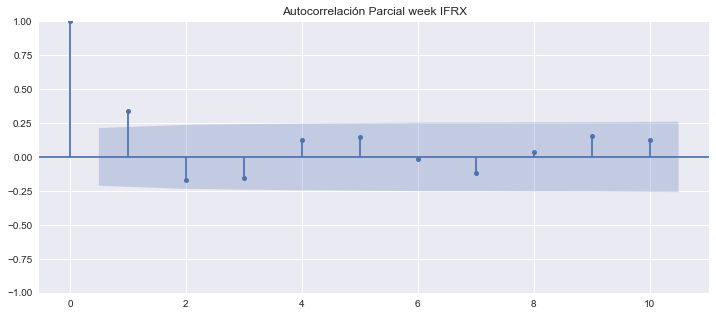

week KLXE


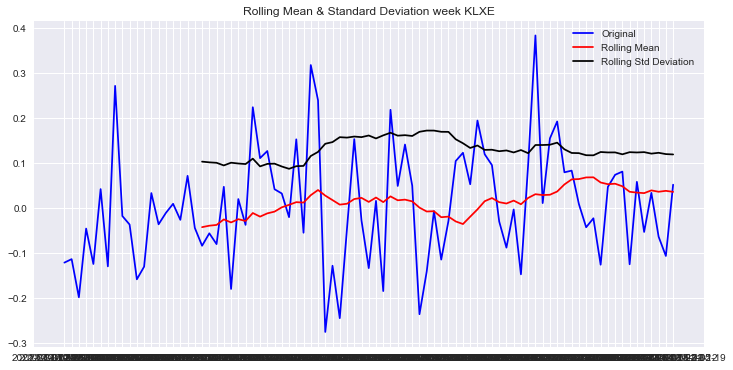

Test Statistic                -7.663467e+00
p-value                        1.664859e-11
#Lags Used                     0.000000e+00
Number of Observations Used    8.400000e+01
Critical Value (1%)           -3.510712e+00
Critical Value (5%)           -2.896616e+00
Critical Value (10%)          -2.585482e+00
dtype: float64


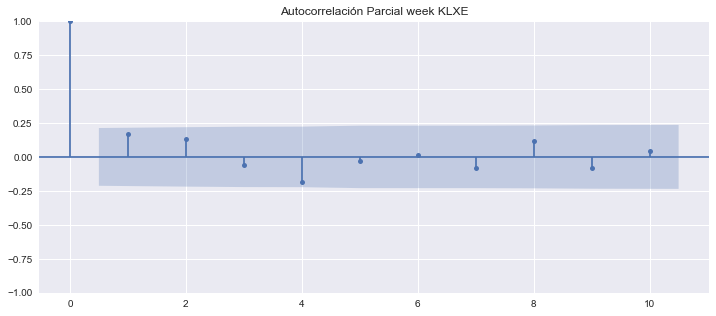

week NMRD


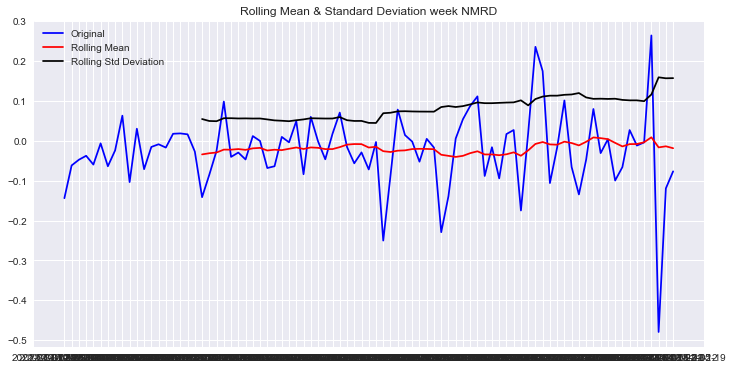

Test Statistic                -7.564038e+00
p-value                        2.958025e-11
#Lags Used                     1.000000e+00
Number of Observations Used    8.300000e+01
Critical Value (1%)           -3.511712e+00
Critical Value (5%)           -2.897048e+00
Critical Value (10%)          -2.585713e+00
dtype: float64


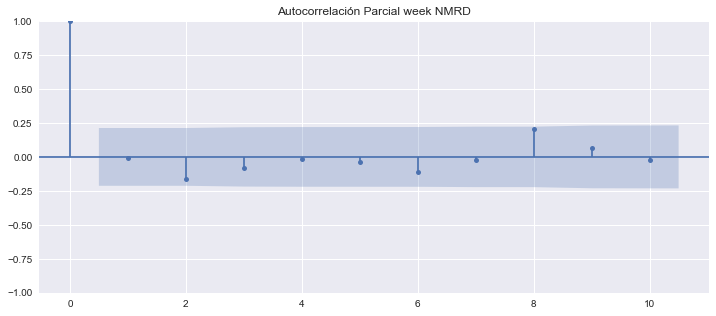

week NMRK


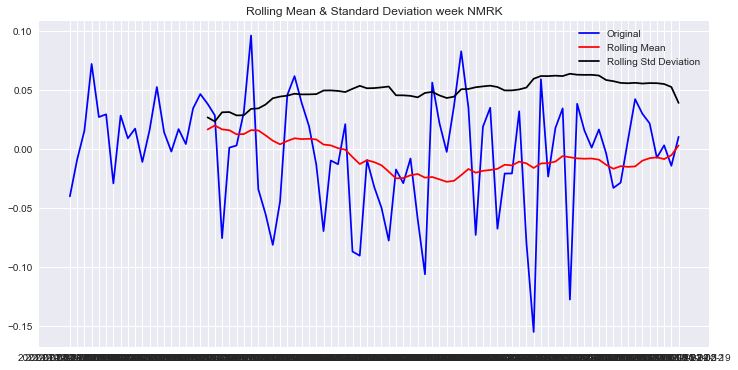

Test Statistic                 -2.219252
p-value                         0.199332
#Lags Used                      6.000000
Number of Observations Used    78.000000
Critical Value (1%)            -3.517114
Critical Value (5%)            -2.899375
Critical Value (10%)           -2.586955
dtype: float64


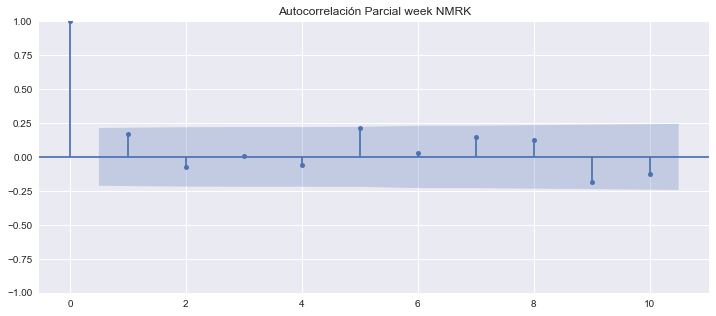

week NVCN


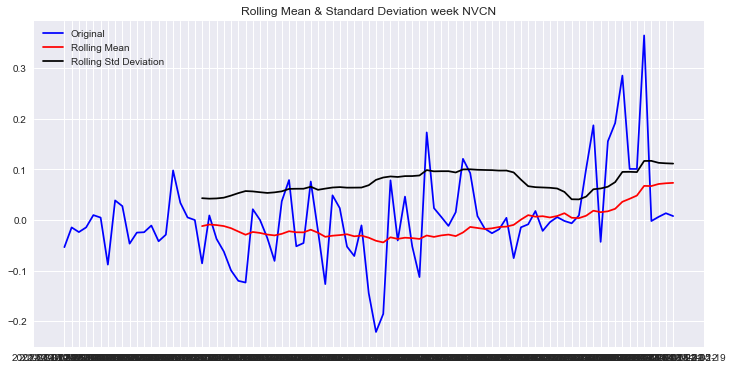

Test Statistic                 -2.738831
p-value                         0.067556
#Lags Used                      5.000000
Number of Observations Used    79.000000
Critical Value (1%)            -3.515977
Critical Value (5%)            -2.898886
Critical Value (10%)           -2.586694
dtype: float64


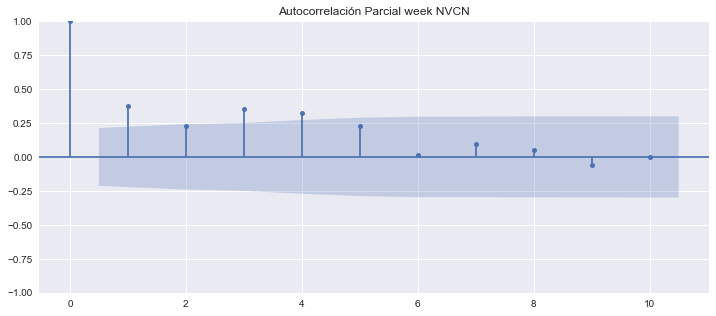

week NVCR


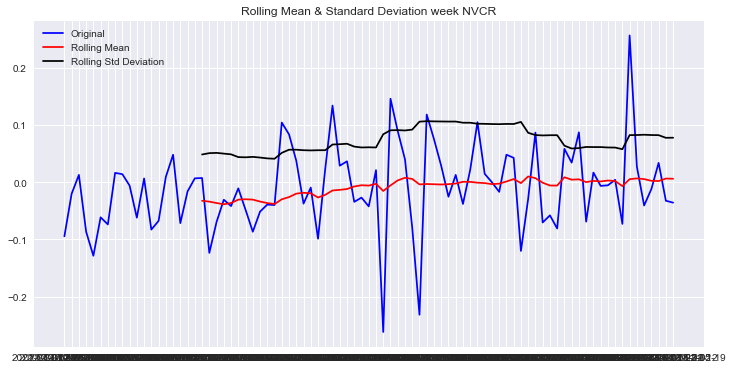

Test Statistic                -6.358564e+00
p-value                        2.507253e-08
#Lags Used                     2.000000e+00
Number of Observations Used    8.200000e+01
Critical Value (1%)           -3.512738e+00
Critical Value (5%)           -2.897490e+00
Critical Value (10%)          -2.585949e+00
dtype: float64


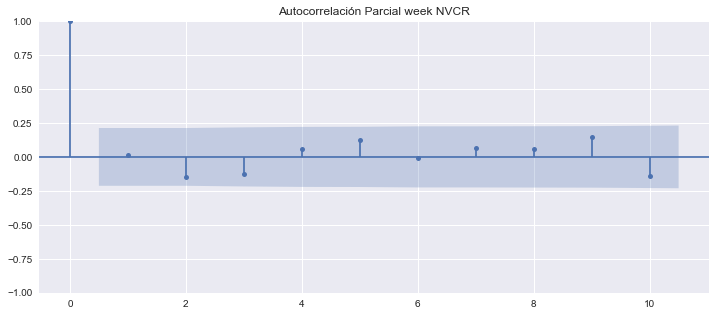

week NVEC


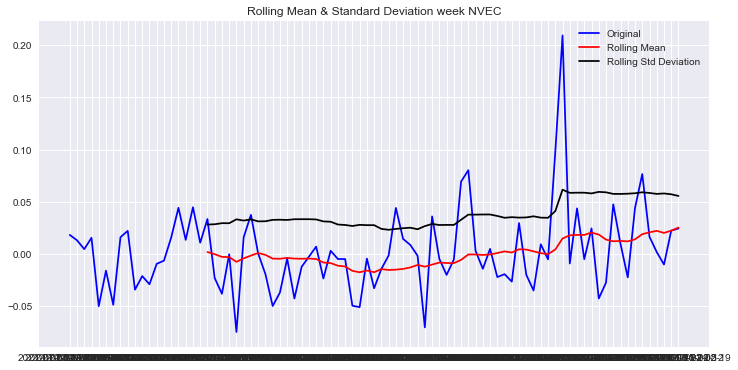

Test Statistic                -6.923142e+00
p-value                        1.132918e-09
#Lags Used                     0.000000e+00
Number of Observations Used    8.400000e+01
Critical Value (1%)           -3.510712e+00
Critical Value (5%)           -2.896616e+00
Critical Value (10%)          -2.585482e+00
dtype: float64


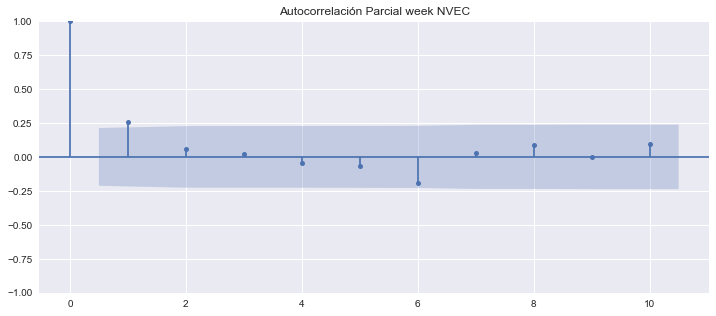

week NVEI


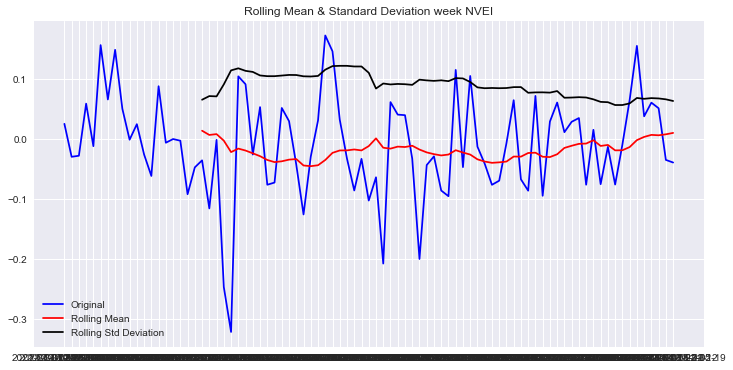

Test Statistic                 -2.606414
p-value                         0.091679
#Lags Used                     11.000000
Number of Observations Used    73.000000
Critical Value (1%)            -3.523284
Critical Value (5%)            -2.902031
Critical Value (10%)           -2.588371
dtype: float64


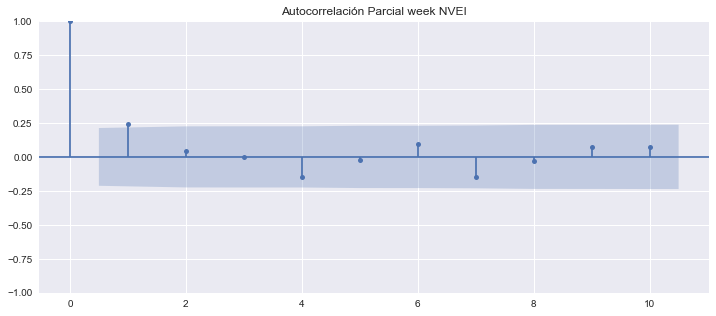

week OPTN


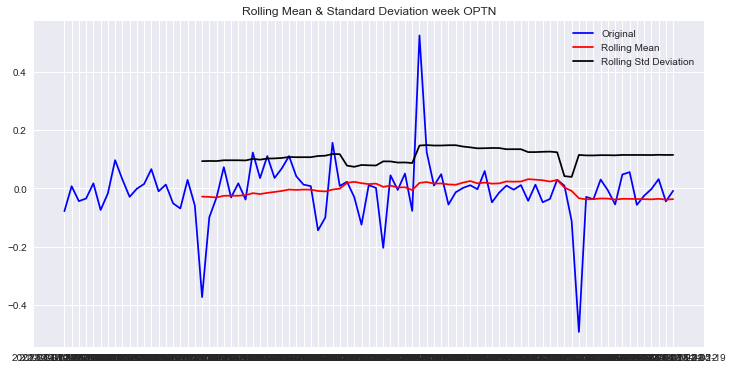

Test Statistic                -7.764452e+00
p-value                        9.267817e-12
#Lags Used                     0.000000e+00
Number of Observations Used    8.400000e+01
Critical Value (1%)           -3.510712e+00
Critical Value (5%)           -2.896616e+00
Critical Value (10%)          -2.585482e+00
dtype: float64


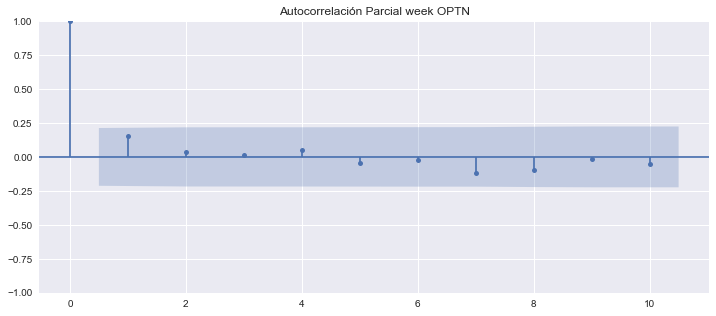

week SCOR


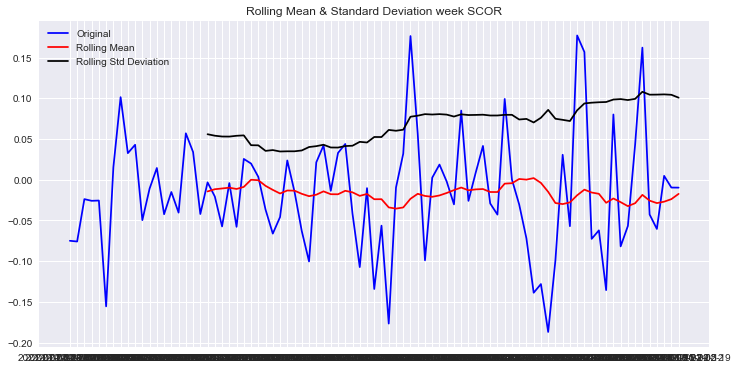

Test Statistic                -7.154468e+00
p-value                        3.080292e-10
#Lags Used                     0.000000e+00
Number of Observations Used    8.400000e+01
Critical Value (1%)           -3.510712e+00
Critical Value (5%)           -2.896616e+00
Critical Value (10%)          -2.585482e+00
dtype: float64


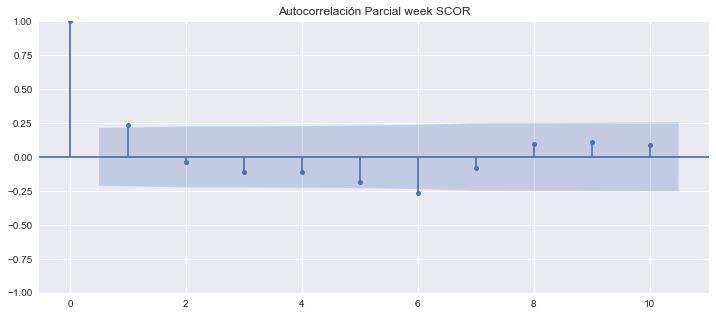

week SDC


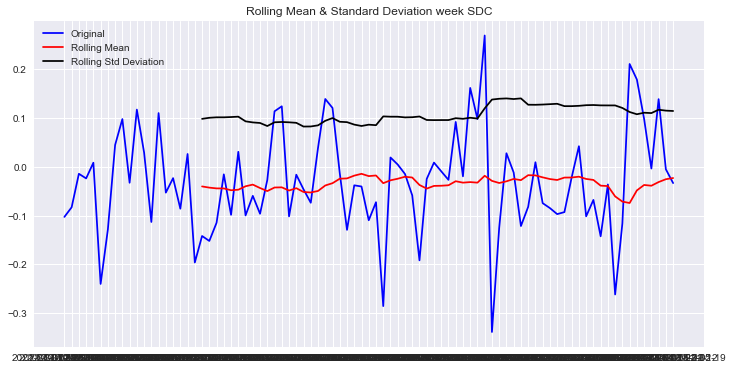

Test Statistic                -7.485632e+00
p-value                        4.647267e-11
#Lags Used                     0.000000e+00
Number of Observations Used    8.400000e+01
Critical Value (1%)           -3.510712e+00
Critical Value (5%)           -2.896616e+00
Critical Value (10%)          -2.585482e+00
dtype: float64


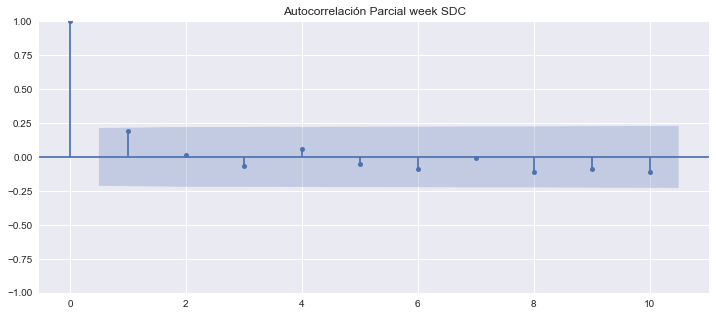

week SLAB


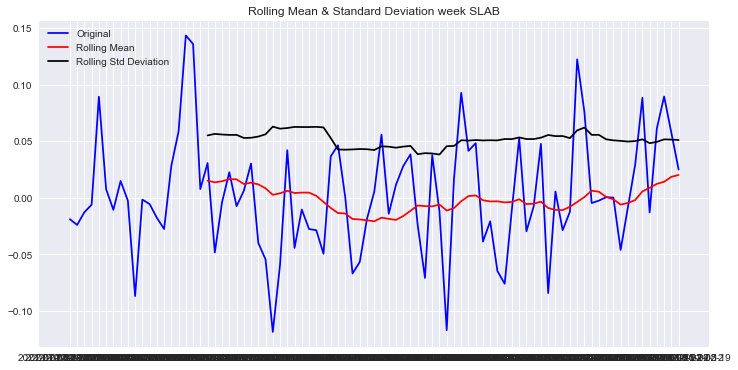

Test Statistic                -6.428792e+00
p-value                        1.717897e-08
#Lags Used                     0.000000e+00
Number of Observations Used    8.400000e+01
Critical Value (1%)           -3.510712e+00
Critical Value (5%)           -2.896616e+00
Critical Value (10%)          -2.585482e+00
dtype: float64


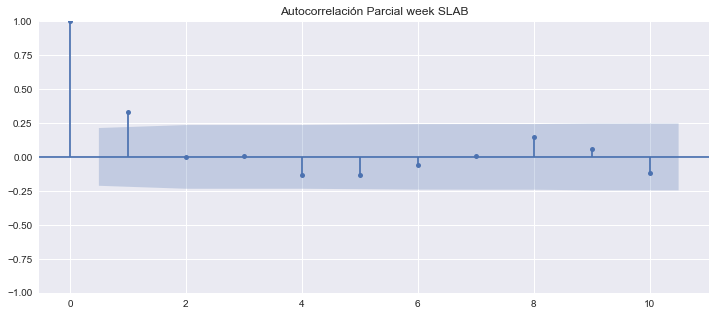

week STRR


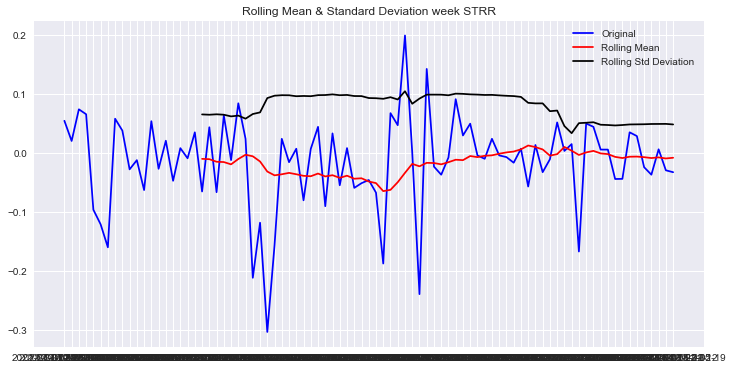

Test Statistic                -8.190740e+00
p-value                        7.680227e-13
#Lags Used                     0.000000e+00
Number of Observations Used    8.400000e+01
Critical Value (1%)           -3.510712e+00
Critical Value (5%)           -2.896616e+00
Critical Value (10%)          -2.585482e+00
dtype: float64


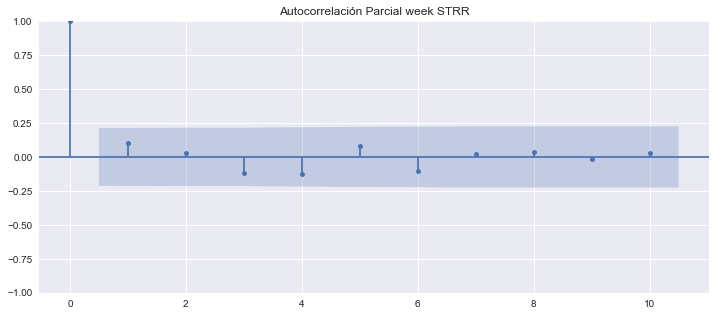

week STRS


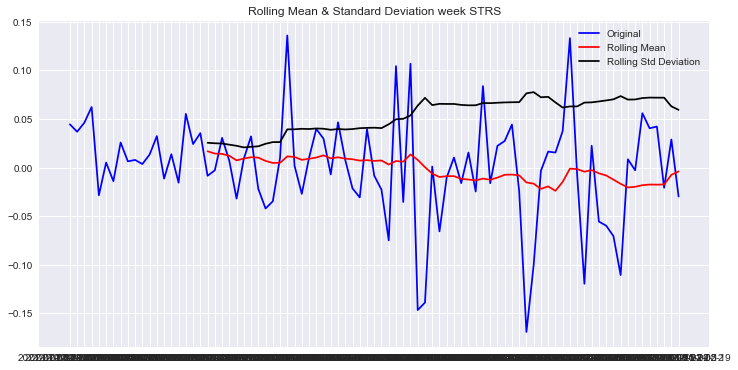

Test Statistic                -7.869340e+00
p-value                        5.033991e-12
#Lags Used                     0.000000e+00
Number of Observations Used    8.400000e+01
Critical Value (1%)           -3.510712e+00
Critical Value (5%)           -2.896616e+00
Critical Value (10%)          -2.585482e+00
dtype: float64


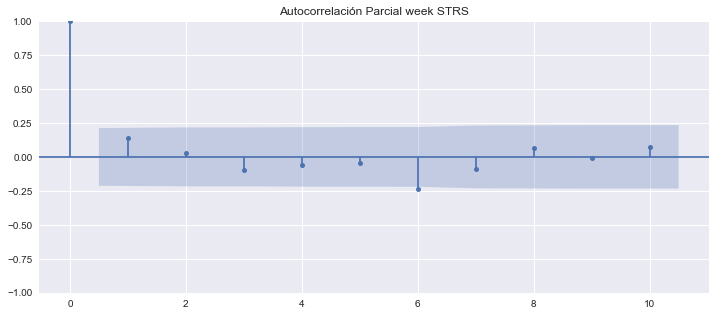

week STRT


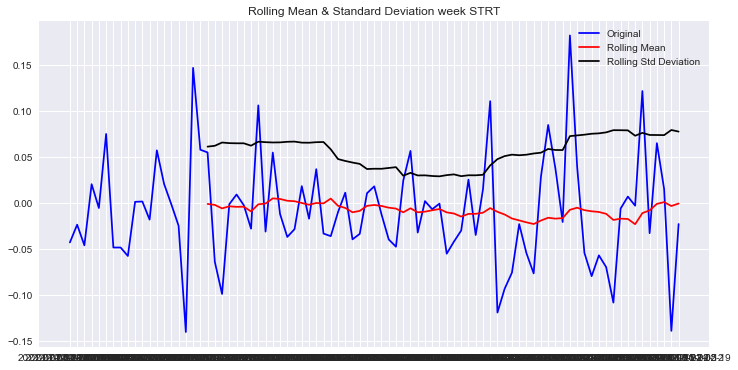

Test Statistic                -6.041794e+00
p-value                        1.340534e-07
#Lags Used                     5.000000e+00
Number of Observations Used    7.900000e+01
Critical Value (1%)           -3.515977e+00
Critical Value (5%)           -2.898886e+00
Critical Value (10%)          -2.586694e+00
dtype: float64


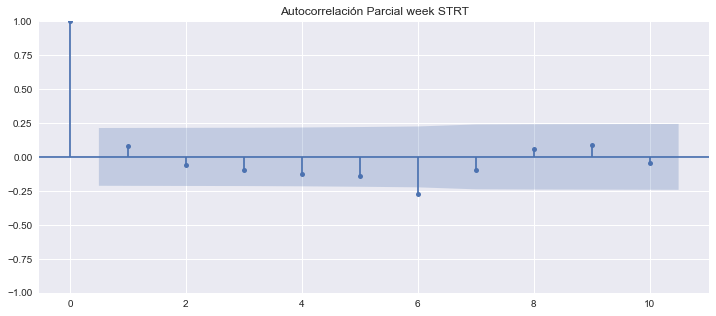

week TWST


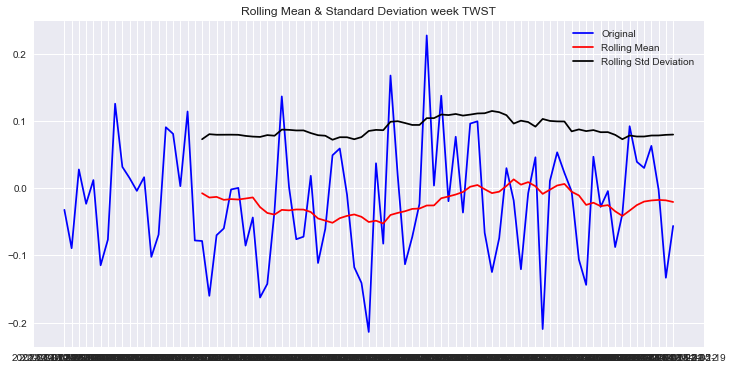

Test Statistic                -7.732606e+00
p-value                        1.115043e-11
#Lags Used                     0.000000e+00
Number of Observations Used    8.400000e+01
Critical Value (1%)           -3.510712e+00
Critical Value (5%)           -2.896616e+00
Critical Value (10%)          -2.585482e+00
dtype: float64


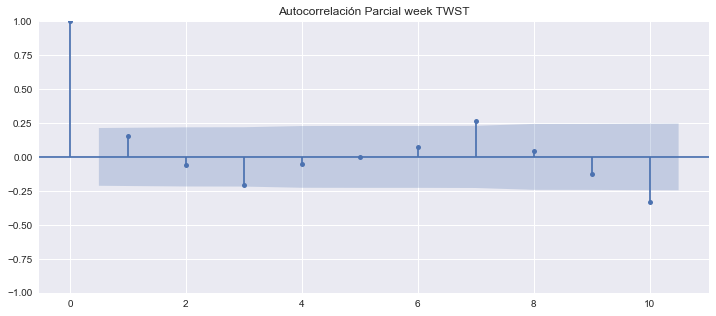

In [52]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

for u in range(len(udiff.columns)):
    plt.figure(figsize=(12, 6))
    item=udiff.columns.__getitem__(u)
    print(item)
    orig = plt.plot(udiff[item], color='blue', label='Original')
    mean = plt.plot(rolmean[item], color='red', label='Rolling Mean')
    std = plt.plot(rolstd[item], color='black', label = 'Rolling Std Deviation')
    jo='Rolling Mean & Standard Deviation {}'.format(item)
    plt.title(jo)
    plt.legend(loc='best')
    plt.show(block=False)
    
    # Perform Dickey-Fuller test
    dftest = sm.tsa.adfuller(udiff[item], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value ({0})'.format(key)] = value
    
    print(dfoutput)
    
    # the autocorrelation chart provides just the correlation at increasing lags
    fig, ax = plt.subplots(figsize=(12,5))
    plot_acf(udiff[item].values, lags=10, ax=ax)
    jo='Autocorrelación Parcial {}'.format(item)
    plt.title(jo)
    plt.show()

# Build ARIMA Model

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   85
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  46.459
Date:                Sat, 18 Feb 2023   AIC                            -80.917
Time:                        17:02:28   BIC                            -66.261
Sample:                             0   HQIC                           -75.022
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0320      0.026     -1.250      0.211      -0.082       0.018
ar.L1         -0.3060      0.858     -0.357      0.721      -1.988       1.376
ar.L2          0.2013      0.459      0.439      0.6

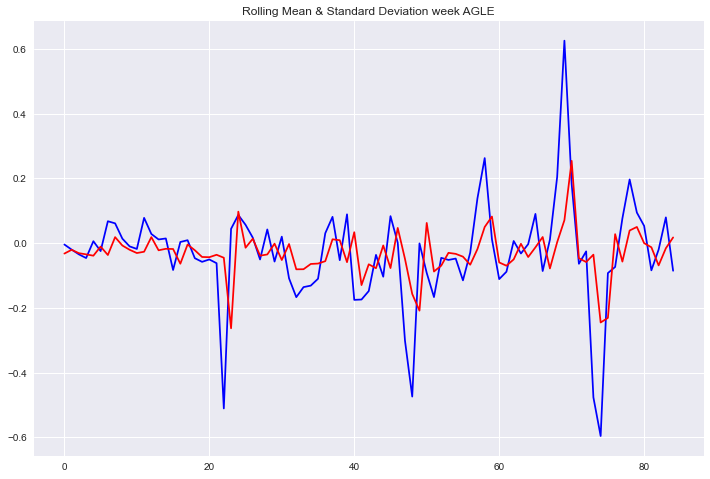

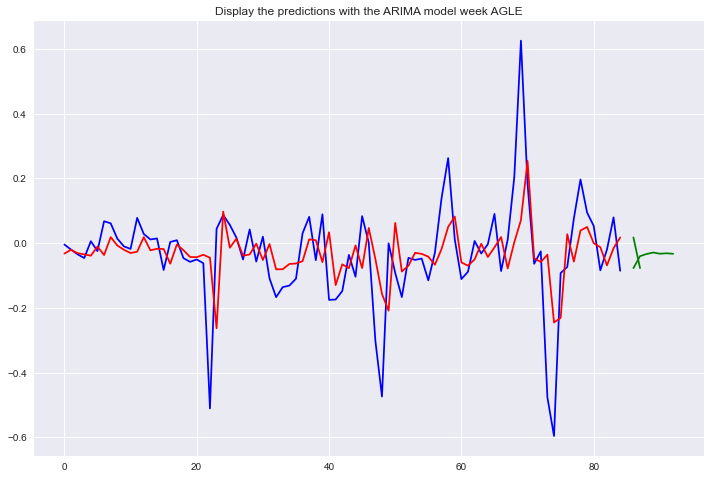

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   85
Model:                 ARIMA(3, 0, 1)   Log Likelihood                 164.122
Date:                Sat, 18 Feb 2023   AIC                           -316.244
Time:                        17:02:28   BIC                           -301.588
Sample:                             0   HQIC                          -310.349
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0027      0.009     -0.303      0.762      -0.020       0.015
ar.L1          0.1695      3.110      0.054      0.957      -5.925       6.264
ar.L2          0.1282      0.927      0.138      0.8

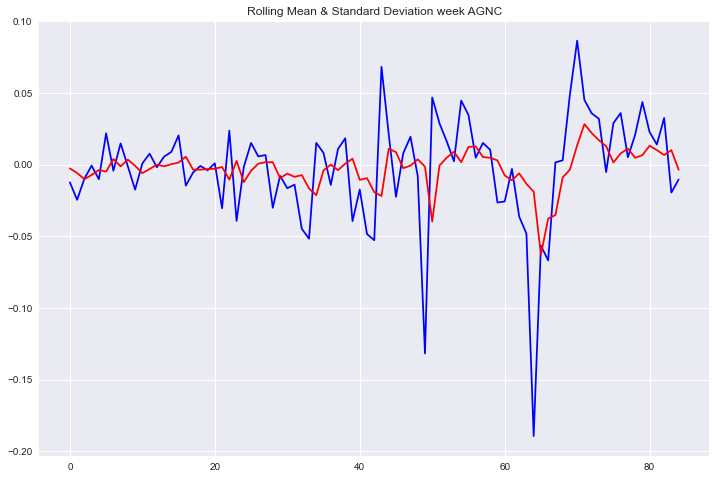

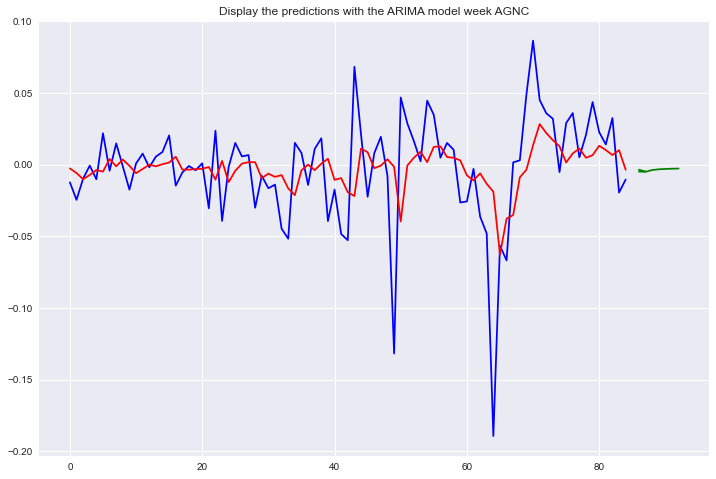

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   85
Model:                 ARIMA(3, 0, 1)   Log Likelihood                 123.409
Date:                Sat, 18 Feb 2023   AIC                           -234.817
Time:                        17:02:29   BIC                           -220.161
Sample:                             0   HQIC                          -228.922
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.008      0.174      0.861      -0.014       0.017
ar.L1          0.4461      2.605      0.171      0.864      -4.659       5.551
ar.L2         -0.0915      0.392     -0.233      0.8

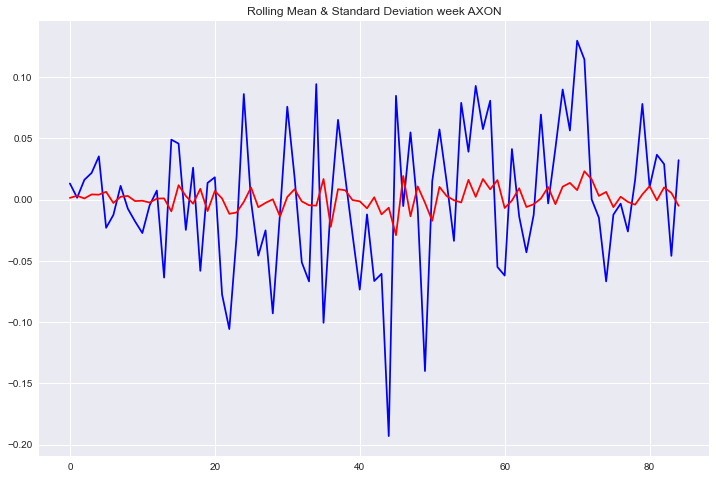

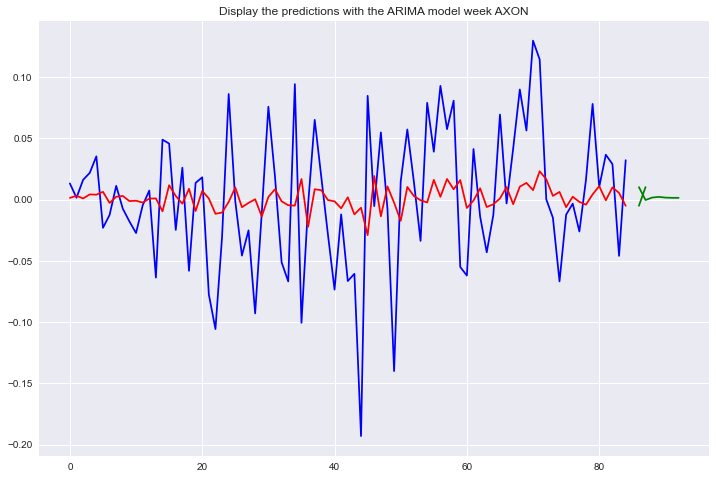

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   85
Model:                 ARIMA(3, 0, 1)   Log Likelihood                 302.975
Date:                Sat, 18 Feb 2023   AIC                           -593.949
Time:                        17:02:30   BIC                           -579.293
Sample:                             0   HQIC                          -588.054
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0012      0.001      1.007      0.314      -0.001       0.003
ar.L1          0.0672      2.235      0.030      0.976      -4.313       4.448
ar.L2          0.0011      0.328      0.003      0.9

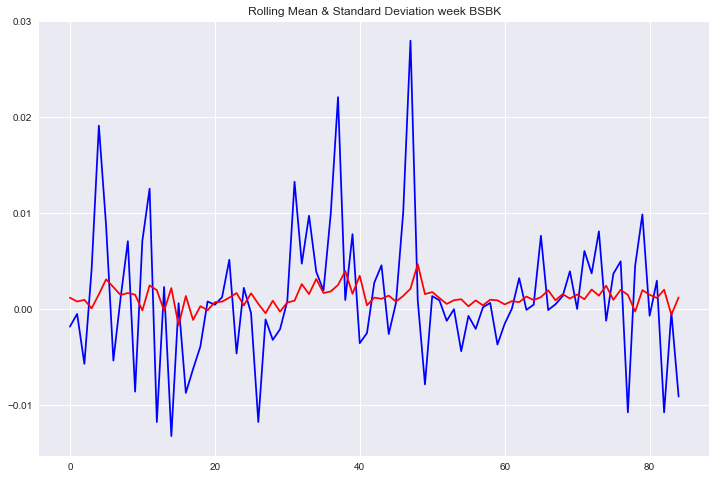

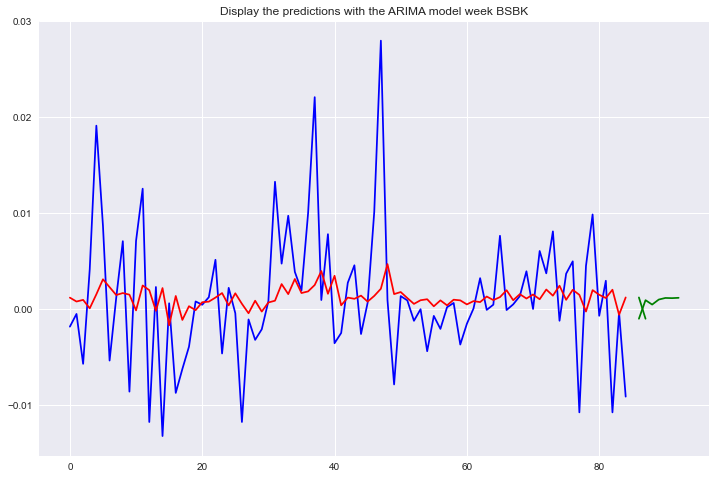

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   85
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  71.275
Date:                Sat, 18 Feb 2023   AIC                           -130.550
Time:                        17:02:31   BIC                           -115.894
Sample:                             0   HQIC                          -124.655
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0288      0.013     -2.248      0.025      -0.054      -0.004
ar.L1          1.0768      0.362      2.975      0.003       0.367       1.786
ar.L2         -0.2802      0.280     -1.000      0.3

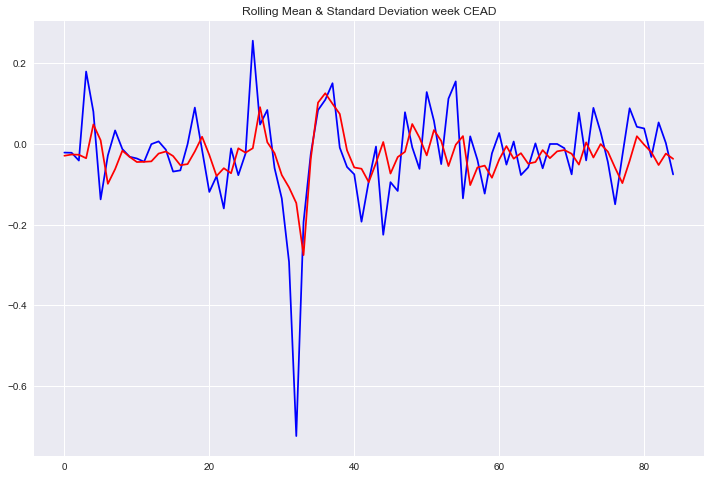

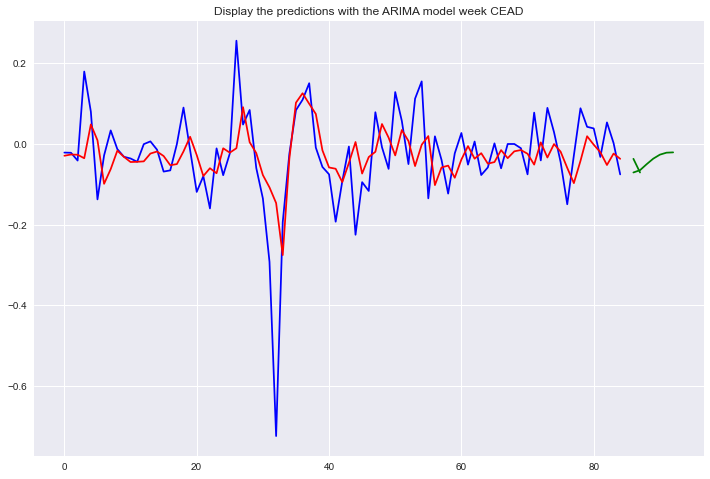

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   85
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  34.142
Date:                Sat, 18 Feb 2023   AIC                            -56.283
Time:                        17:02:31   BIC                            -41.627
Sample:                             0   HQIC                           -50.388
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0243      0.025     -0.981      0.326      -0.073       0.024
ar.L1         -0.6103      0.196     -3.117      0.002      -0.994      -0.227
ar.L2         -0.1396      0.122     -1.141      0.2

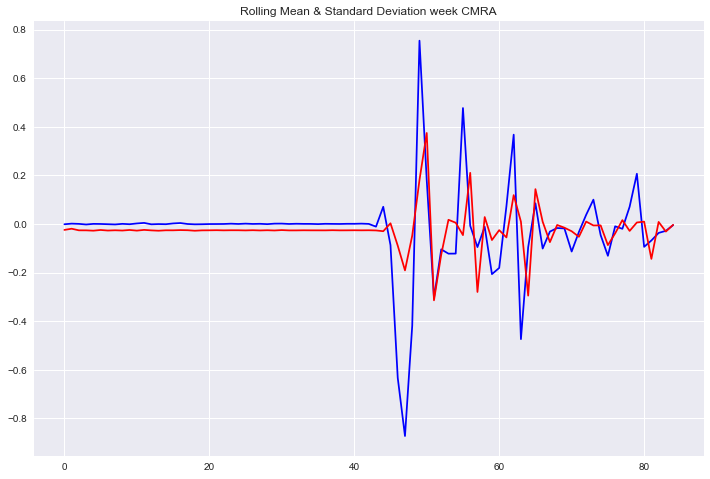

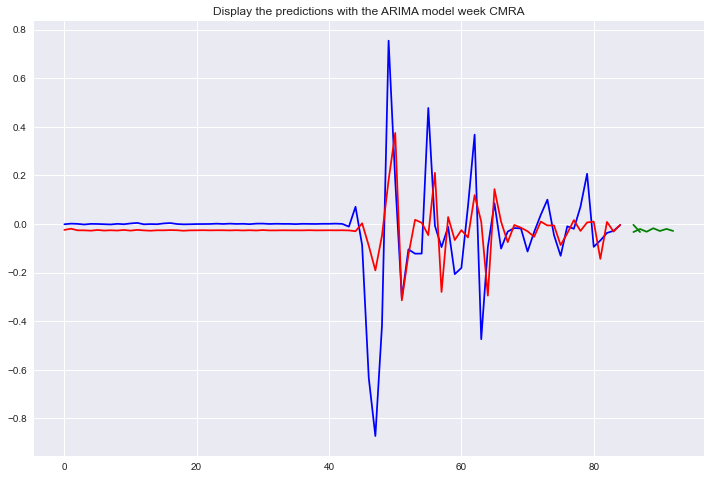

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   85
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  74.183
Date:                Sat, 18 Feb 2023   AIC                           -136.366
Time:                        17:02:32   BIC                           -121.710
Sample:                             0   HQIC                          -130.471
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0185      0.018     -1.014      0.310      -0.054       0.017
ar.L1         -0.5164      0.864     -0.598      0.550      -2.210       1.177
ar.L2          0.0507      0.191      0.265      0.7

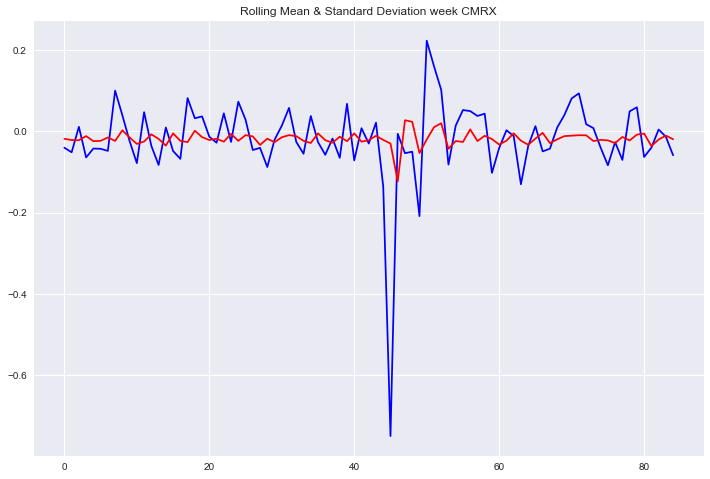

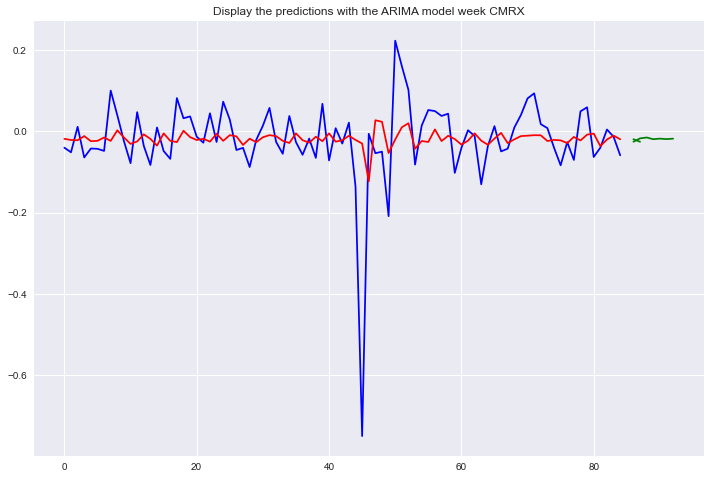

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   85
Model:                 ARIMA(3, 0, 1)   Log Likelihood                 143.493
Date:                Sat, 18 Feb 2023   AIC                           -274.987
Time:                        17:02:32   BIC                           -260.331
Sample:                             0   HQIC                          -269.092
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0028      0.006      0.439      0.661      -0.010       0.015
ar.L1          0.2683      0.901      0.298      0.766      -1.497       2.034
ar.L2          0.0744      0.259      0.287      0.7

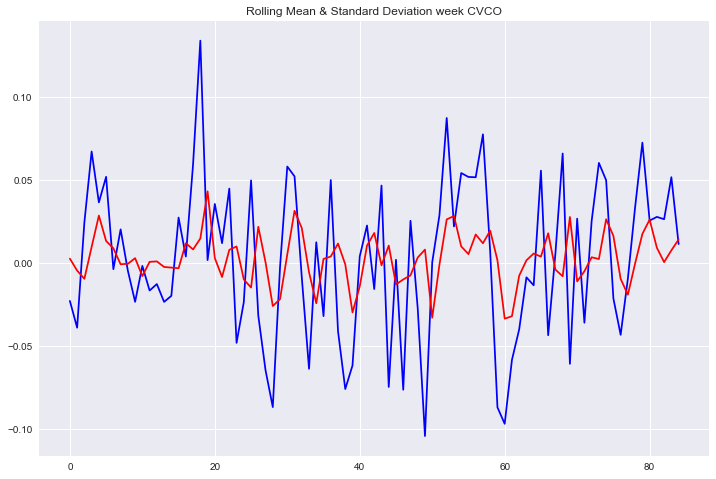

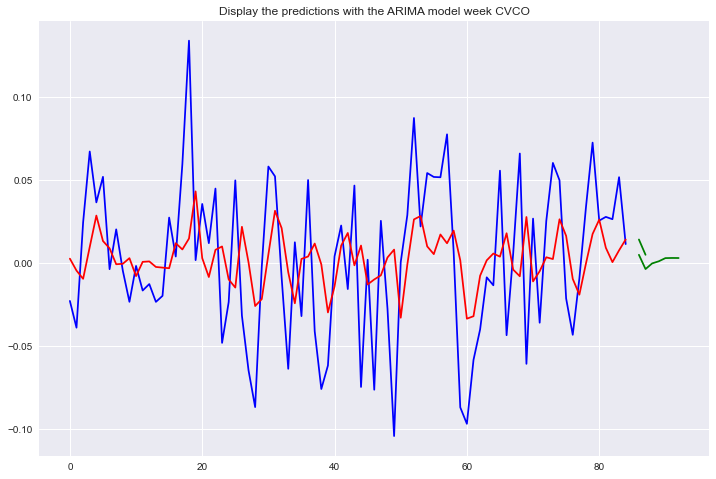

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   85
Model:                 ARIMA(3, 0, 1)   Log Likelihood                 179.487
Date:                Sat, 18 Feb 2023   AIC                           -346.973
Time:                        17:02:33   BIC                           -332.317
Sample:                             0   HQIC                          -341.078
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0035      0.006      0.581      0.561      -0.008       0.015
ar.L1          0.1504      8.872      0.017      0.986     -17.239      17.540
ar.L2          0.2229      2.109      0.106      0.9

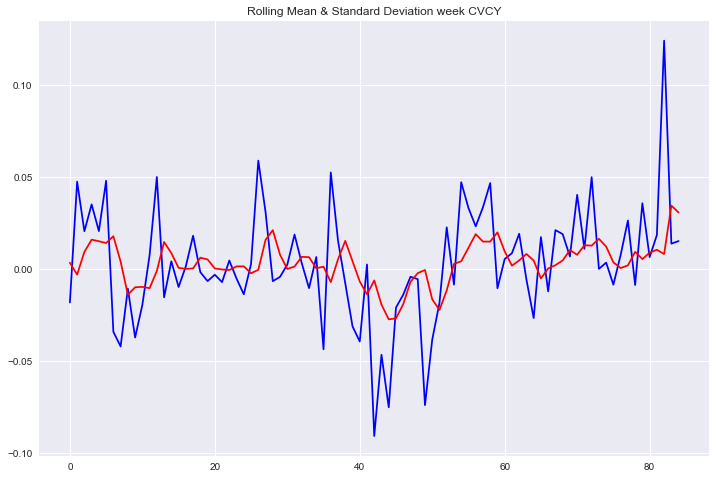

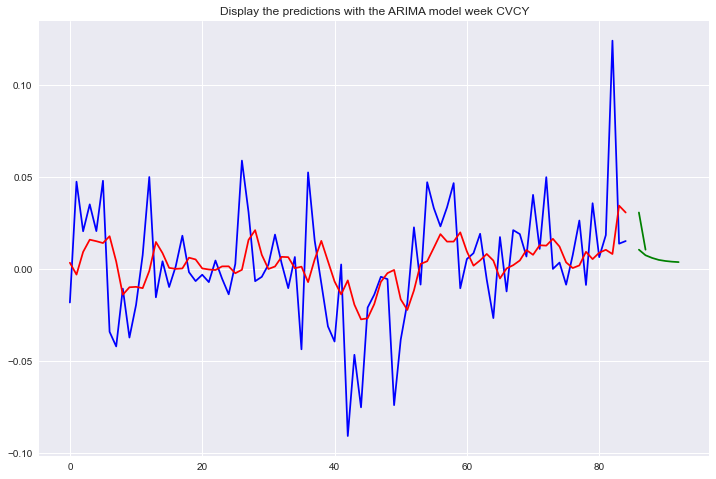

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   85
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  94.454
Date:                Sat, 18 Feb 2023   AIC                           -176.907
Time:                        17:02:34   BIC                           -162.251
Sample:                             0   HQIC                          -171.012
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0073      0.014     -0.507      0.612      -0.036       0.021
ar.L1         -0.4048      1.110     -0.365      0.715      -2.580       1.771
ar.L2          0.0579      0.423      0.137      0.8

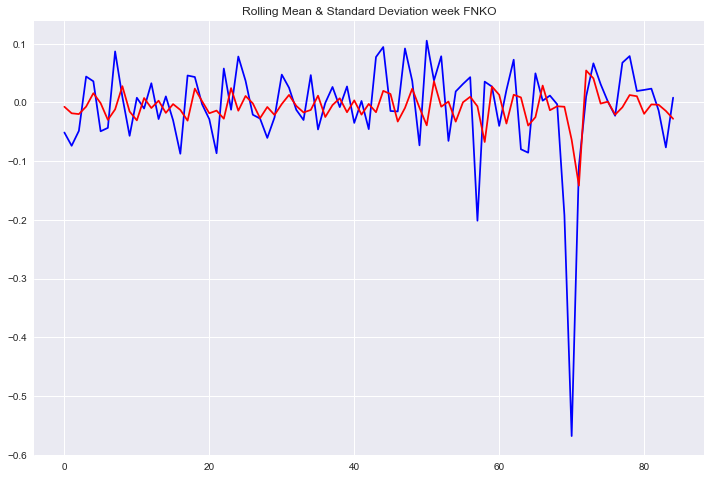

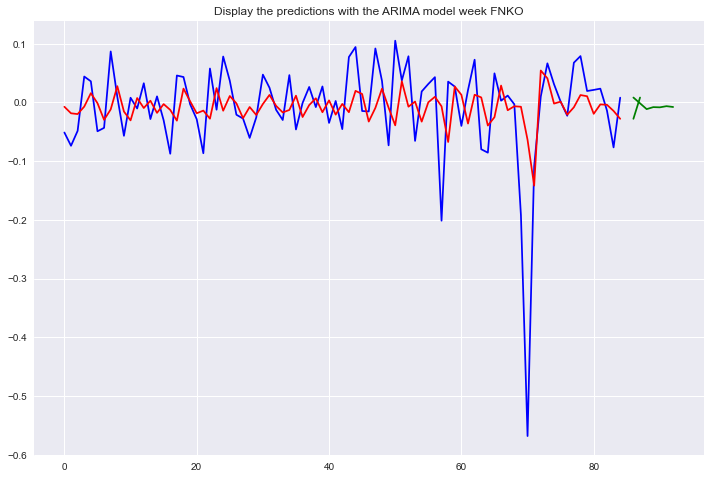

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   85
Model:                 ARIMA(3, 0, 1)   Log Likelihood                 205.233
Date:                Sat, 18 Feb 2023   AIC                           -398.466
Time:                        17:02:34   BIC                           -383.810
Sample:                             0   HQIC                          -392.570
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.002      0.456      0.648      -0.003       0.006
ar.L1          0.0052      2.116      0.002      0.998      -4.142       4.152
ar.L2         -0.0135      0.133     -0.101      0.9

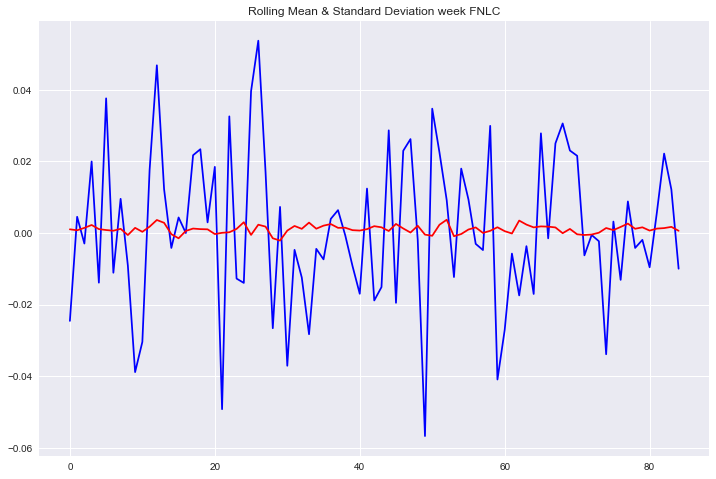

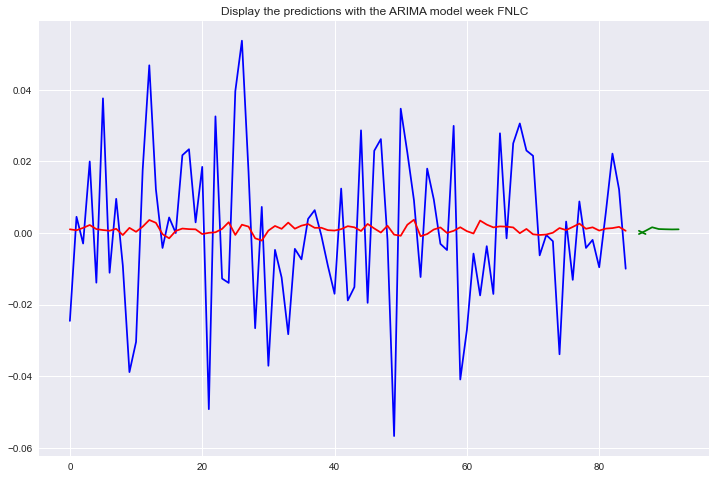

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   85
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  77.564
Date:                Sat, 18 Feb 2023   AIC                           -143.128
Time:                        17:02:35   BIC                           -128.472
Sample:                             0   HQIC                          -137.233
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0026      0.015     -0.176      0.860      -0.032       0.027
ar.L1         -0.4878      0.227     -2.151      0.031      -0.932      -0.043
ar.L2          0.1175      0.119      0.986      0.3

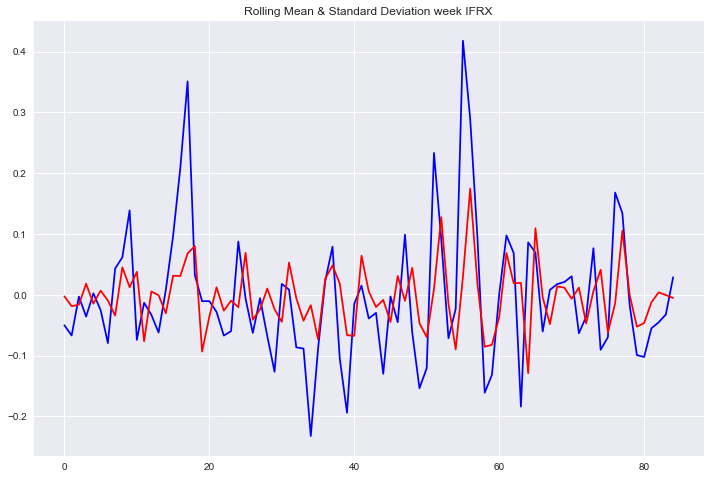

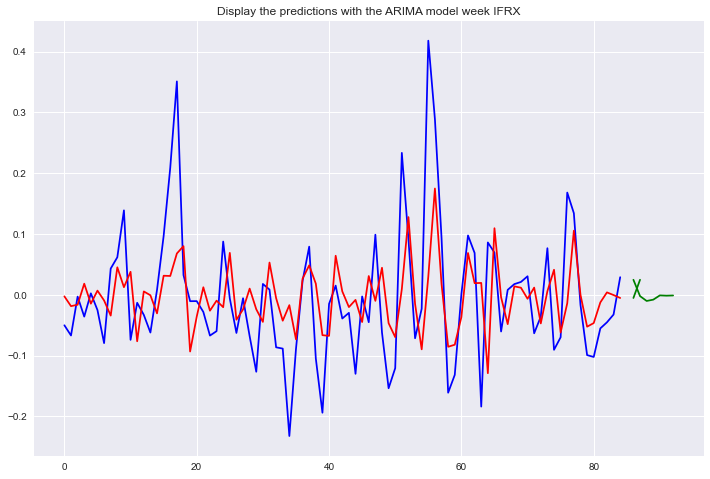

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   85
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  57.689
Date:                Sat, 18 Feb 2023   AIC                           -103.378
Time:                        17:02:36   BIC                            -88.722
Sample:                             0   HQIC                           -97.483
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0052      0.015      0.352      0.725      -0.024       0.034
ar.L1          0.6733      0.547      1.231      0.218      -0.399       1.746
ar.L2          0.0443      0.148      0.299      0.7

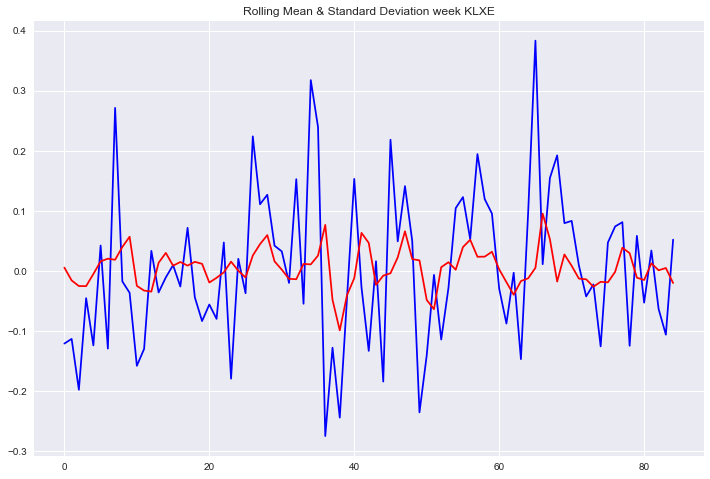

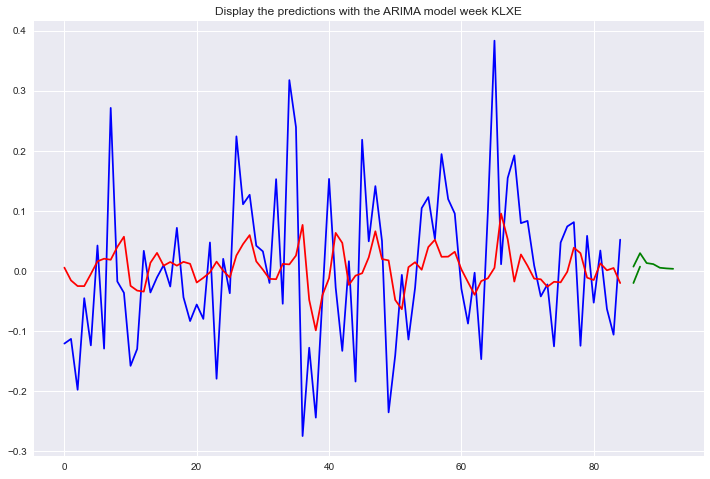

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   85
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  80.992
Date:                Sat, 18 Feb 2023   AIC                           -149.985
Time:                        17:02:36   BIC                           -135.329
Sample:                             0   HQIC                          -144.090
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0227      0.007     -3.266      0.001      -0.036      -0.009
ar.L1          0.6238      0.462      1.350      0.177      -0.282       1.529
ar.L2         -0.1685      0.147     -1.146      0.2

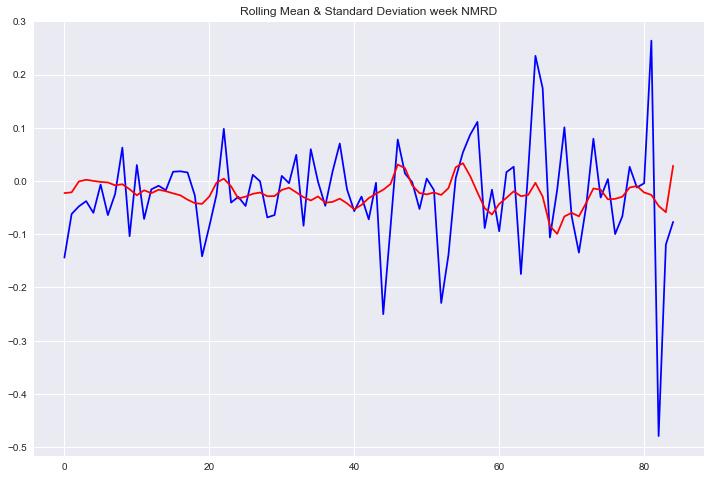

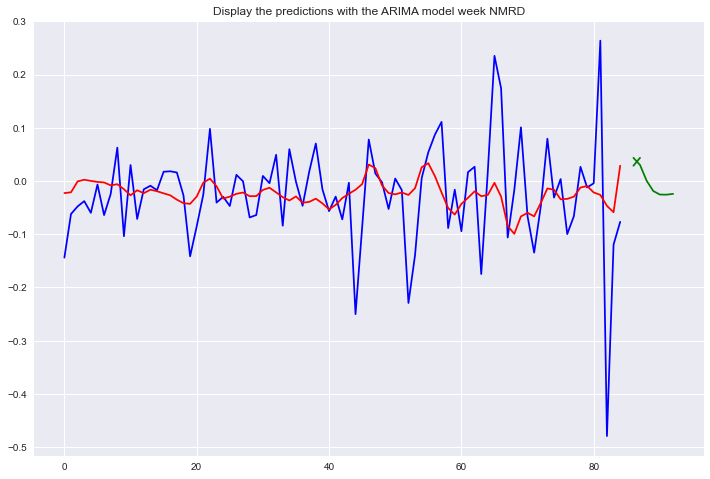

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   85
Model:                 ARIMA(3, 0, 1)   Log Likelihood                 143.377
Date:                Sat, 18 Feb 2023   AIC                           -274.755
Time:                        17:02:37   BIC                           -260.099
Sample:                             0   HQIC                          -268.860
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0038      0.007     -0.590      0.556      -0.017       0.009
ar.L1         -0.6104      0.178     -3.432      0.001      -0.959      -0.262
ar.L2          0.0220      0.150      0.146      0.8

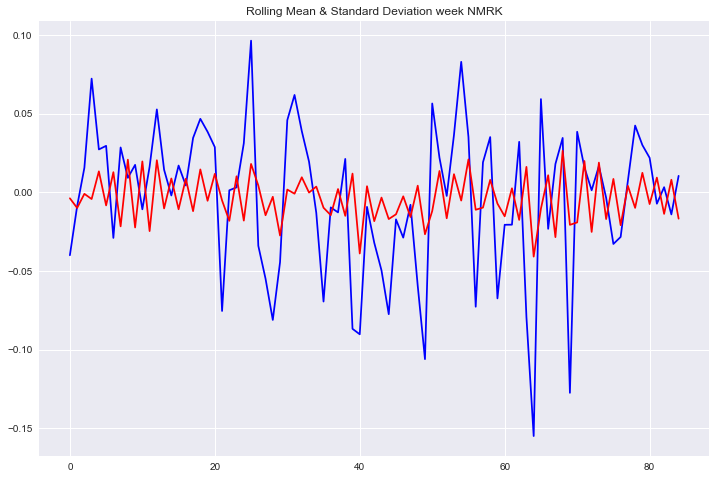

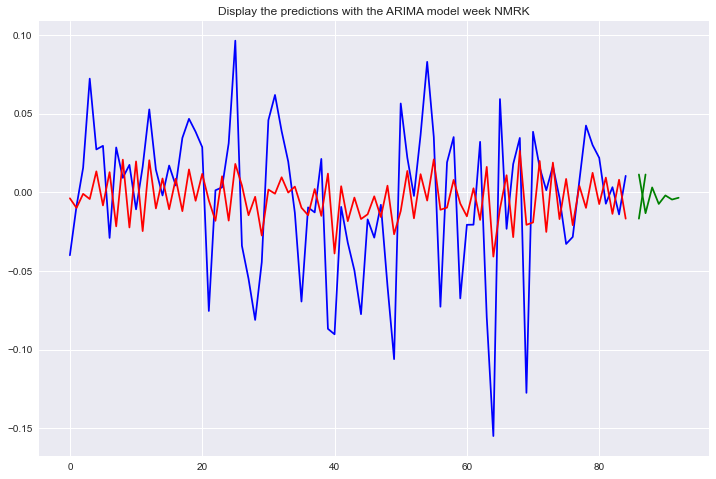

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   85
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  95.880
Date:                Sat, 18 Feb 2023   AIC                           -179.760
Time:                        17:02:38   BIC                           -165.104
Sample:                             0   HQIC                          -173.865
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.026      0.066      0.948      -0.050       0.054
ar.L1          0.5874      0.331      1.774      0.076      -0.062       1.236
ar.L2         -0.0932      0.155     -0.600      0.5

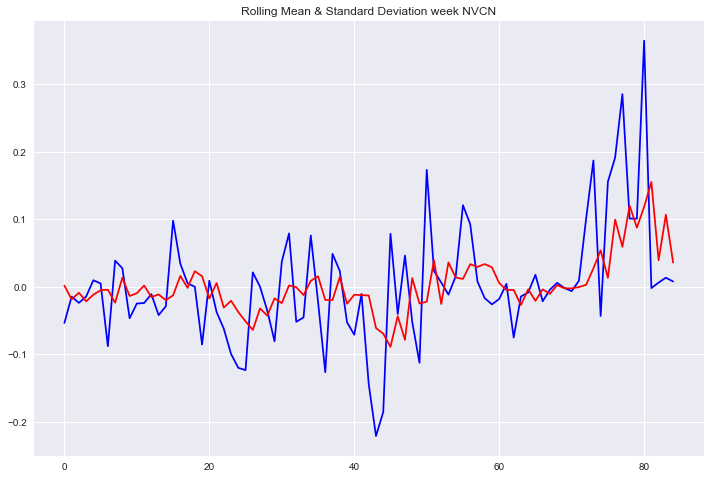

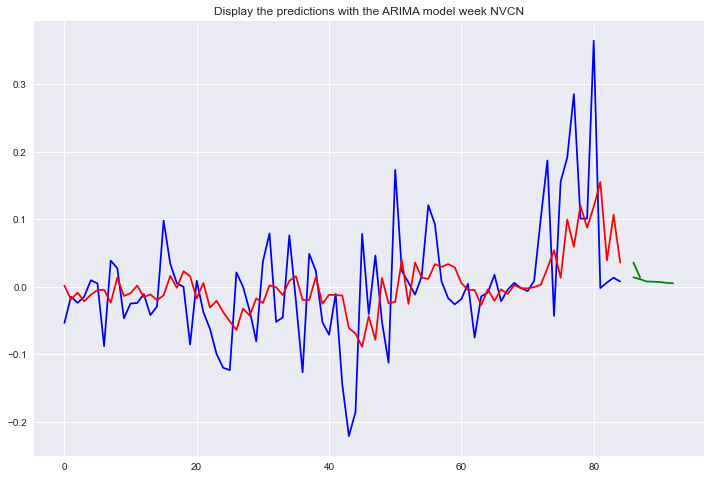

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   85
Model:                 ARIMA(3, 0, 1)   Log Likelihood                 100.822
Date:                Sat, 18 Feb 2023   AIC                           -189.644
Time:                        17:02:38   BIC                           -174.988
Sample:                             0   HQIC                          -183.749
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0101      0.007     -1.477      0.140      -0.024       0.003
ar.L1         -0.1228      0.905     -0.136      0.892      -1.897       1.651
ar.L2         -0.1457      0.144     -1.015      0.3

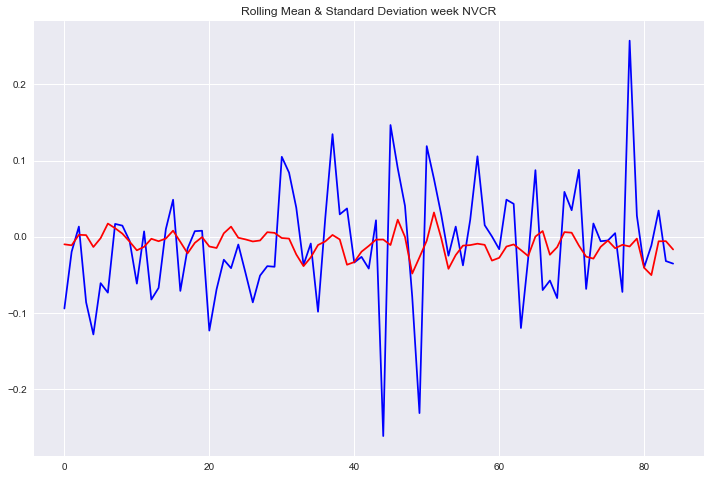

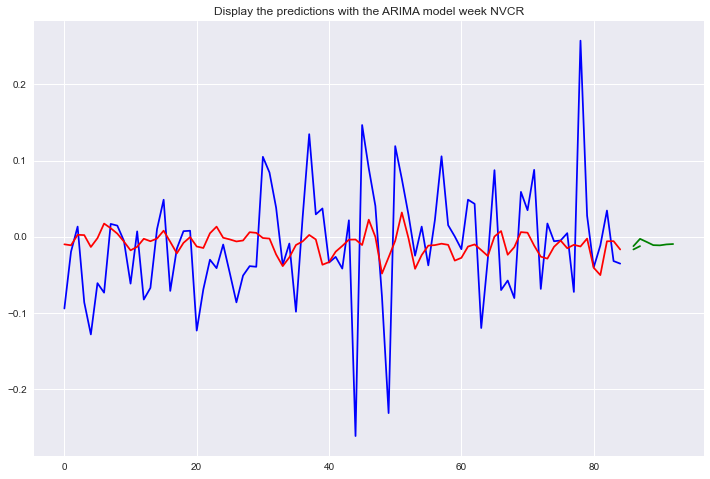

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   85
Model:                 ARIMA(3, 0, 1)   Log Likelihood                 157.120
Date:                Sat, 18 Feb 2023   AIC                           -302.240
Time:                        17:02:39   BIC                           -287.584
Sample:                             0   HQIC                          -296.345
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0020      0.007      0.290      0.772      -0.012       0.016
ar.L1         -0.4834      0.774     -0.625      0.532      -2.000       1.033
ar.L2          0.1881      0.252      0.747      0.4

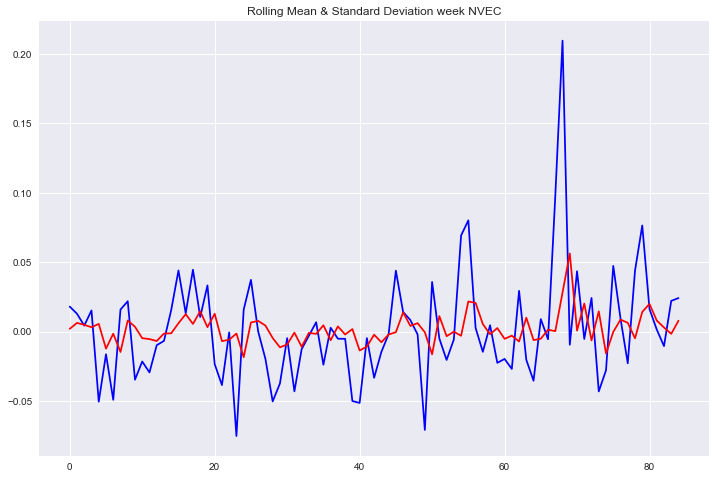

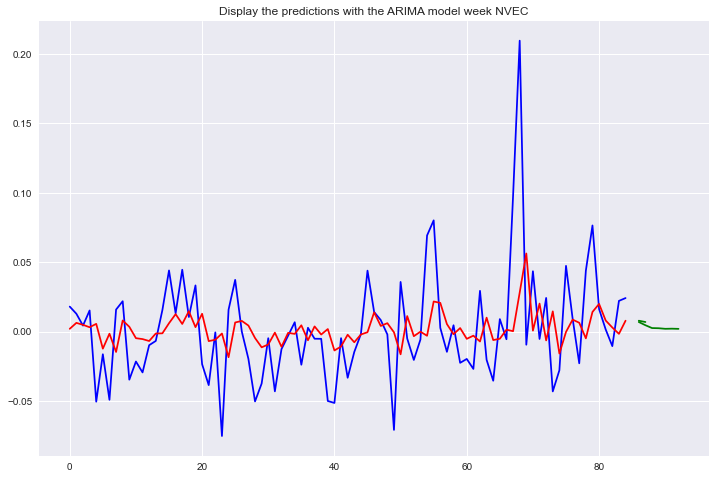

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   85
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  90.685
Date:                Sat, 18 Feb 2023   AIC                           -169.371
Time:                        17:02:39   BIC                           -154.715
Sample:                             0   HQIC                          -163.476
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0105      0.014     -0.760      0.447      -0.038       0.017
ar.L1         -0.2540      2.276     -0.112      0.911      -4.715       4.207
ar.L2          0.0989      0.589      0.168      0.8

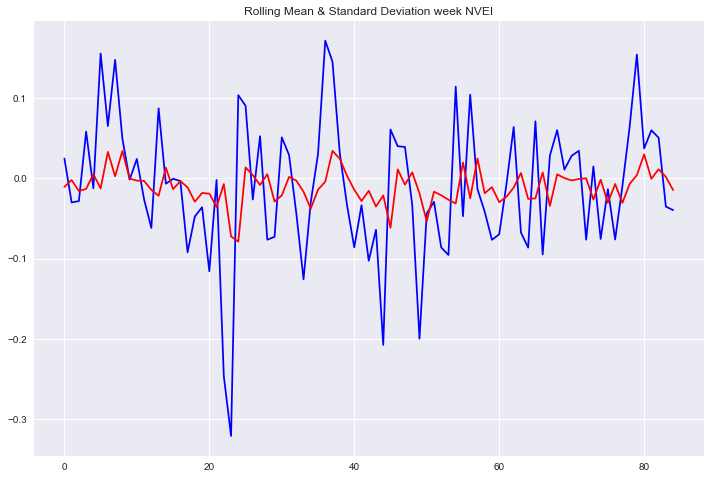

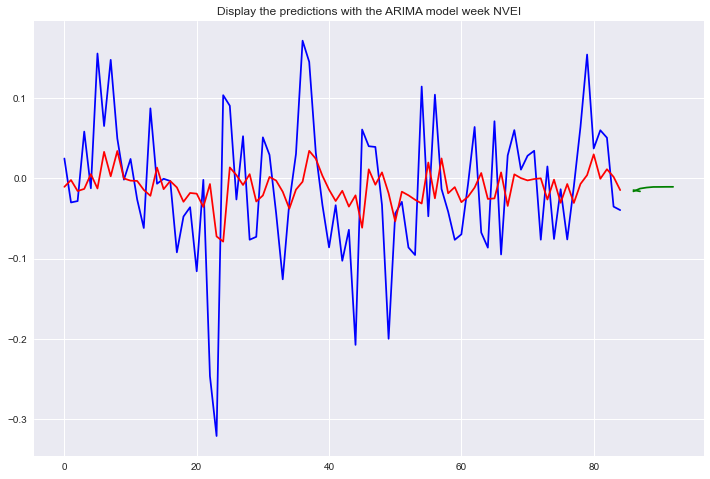

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   85
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  71.044
Date:                Sat, 18 Feb 2023   AIC                           -130.087
Time:                        17:02:40   BIC                           -115.431
Sample:                             0   HQIC                          -124.192
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0075      0.021     -0.356      0.722      -0.049       0.034
ar.L1          0.0782     34.945      0.002      0.998     -68.413      68.570
ar.L2          0.0201      5.368      0.004      0.9

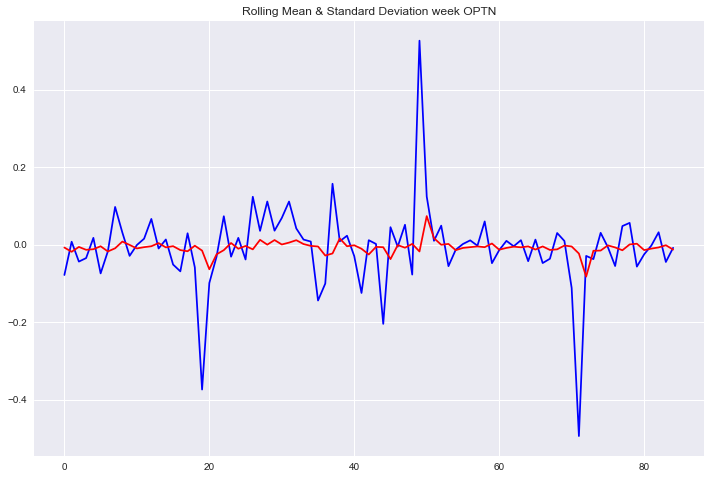

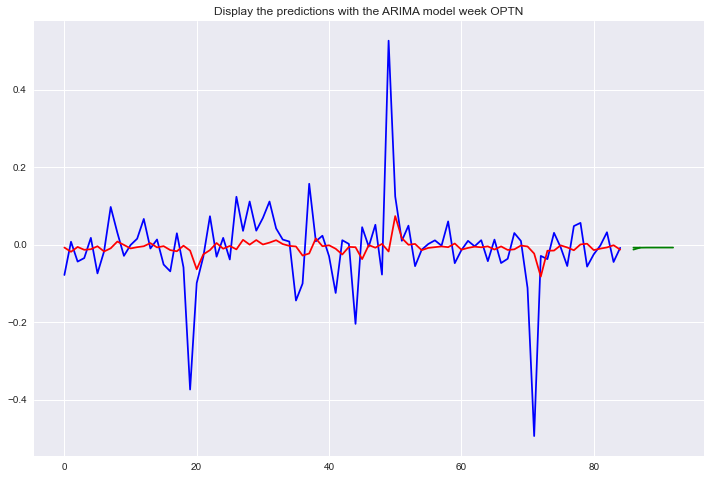

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   85
Model:                 ARIMA(3, 0, 1)   Log Likelihood                 111.631
Date:                Sat, 18 Feb 2023   AIC                           -211.262
Time:                        17:02:41   BIC                           -196.606
Sample:                             0   HQIC                          -205.367
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0163      0.001    -15.173      0.000      -0.018      -0.014
ar.L1          1.0968      0.119      9.233      0.000       0.864       1.330
ar.L2         -0.2826      0.162     -1.740      0.0

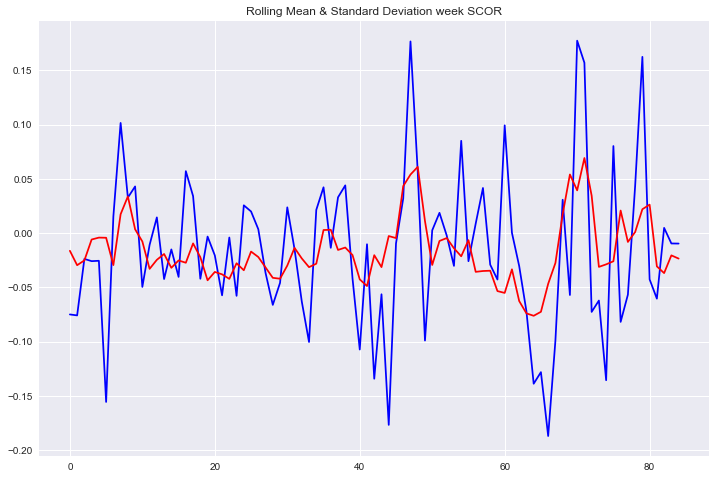

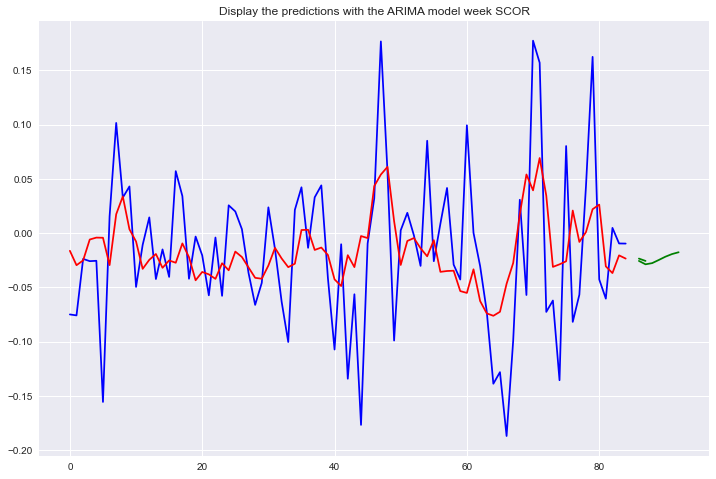

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   85
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  71.494
Date:                Sat, 18 Feb 2023   AIC                           -130.989
Time:                        17:02:41   BIC                           -116.333
Sample:                             0   HQIC                          -125.094
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0315      0.014     -2.173      0.030      -0.060      -0.003
ar.L1         -0.2844      1.027     -0.277      0.782      -2.297       1.729
ar.L2          0.0848      0.188      0.450      0.6

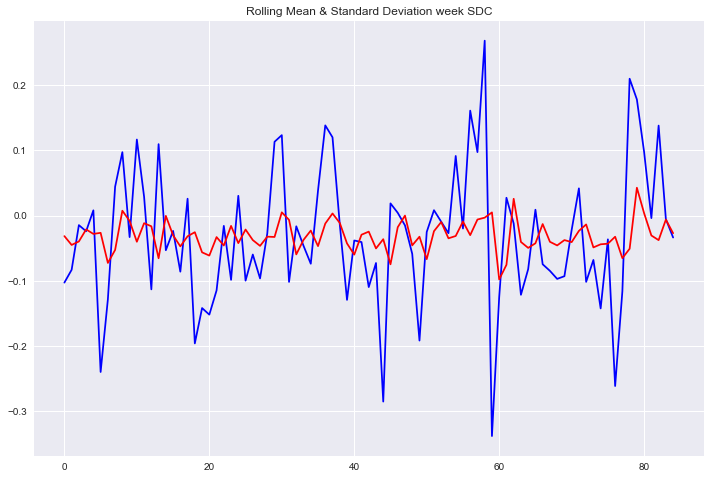

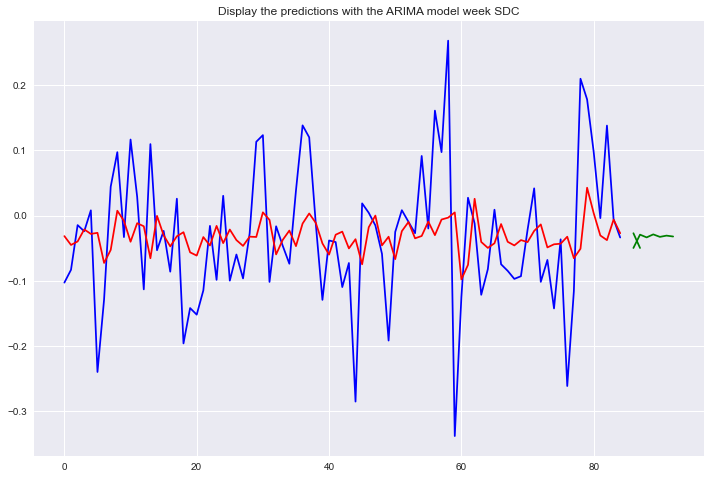

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   85
Model:                 ARIMA(3, 0, 1)   Log Likelihood                 139.154
Date:                Sat, 18 Feb 2023   AIC                           -266.307
Time:                        17:02:42   BIC                           -251.651
Sample:                             0   HQIC                          -260.412
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0034      0.007      0.473      0.636      -0.011       0.017
ar.L1         -0.5872      0.133     -4.400      0.000      -0.849      -0.326
ar.L2          0.1777      0.133      1.336      0.1

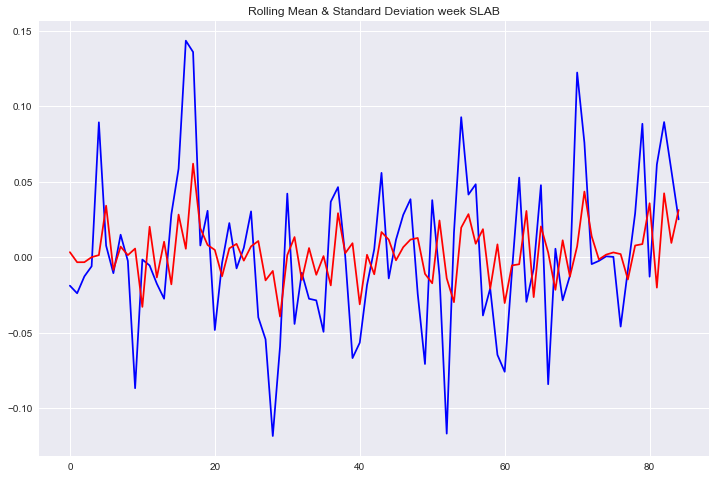

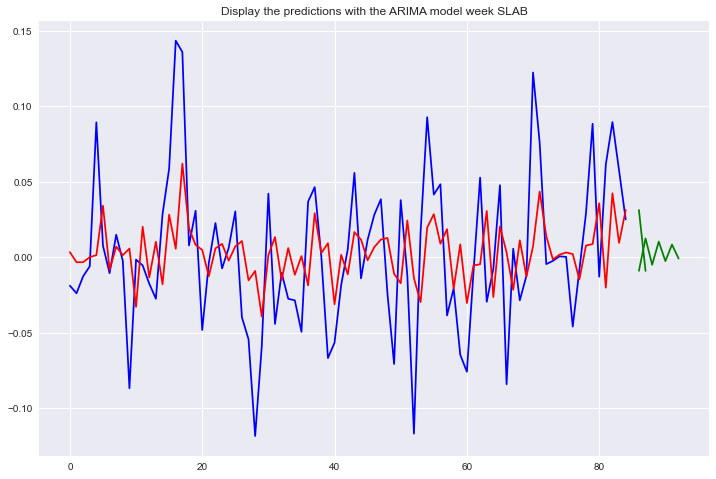

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   85
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  97.669
Date:                Sat, 18 Feb 2023   AIC                           -183.338
Time:                        17:02:43   BIC                           -168.683
Sample:                             0   HQIC                          -177.443
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0151      0.010     -1.554      0.120      -0.034       0.004
ar.L1          0.4904      0.828      0.593      0.553      -1.132       2.113
ar.L2         -0.0104      0.153     -0.068      0.9

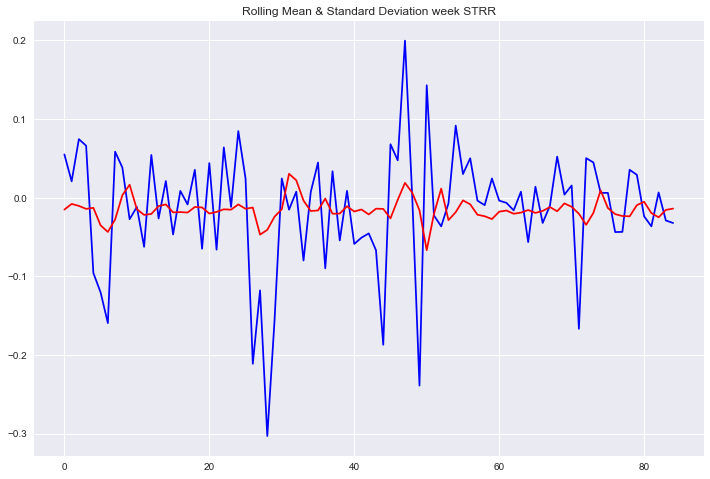

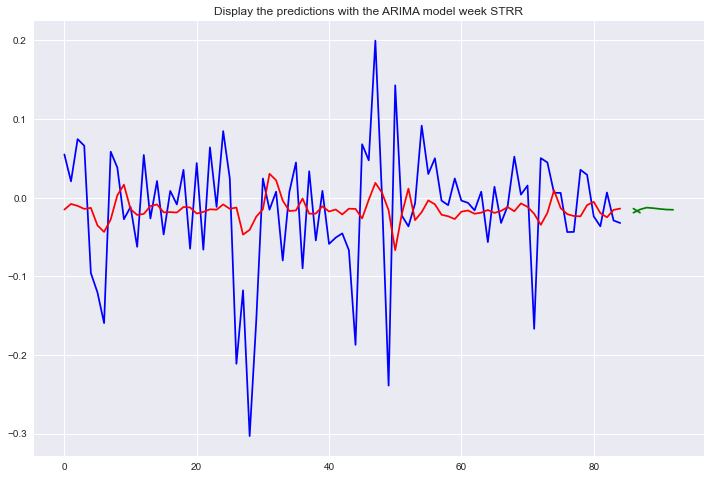

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   85
Model:                 ARIMA(3, 0, 1)   Log Likelihood                 129.802
Date:                Sat, 18 Feb 2023   AIC                           -247.604
Time:                        17:02:43   BIC                           -232.948
Sample:                             0   HQIC                          -241.709
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0007      0.005     -0.137      0.891      -0.011       0.009
ar.L1          0.8169      0.431      1.894      0.058      -0.028       1.662
ar.L2         -0.0734      0.122     -0.601      0.5

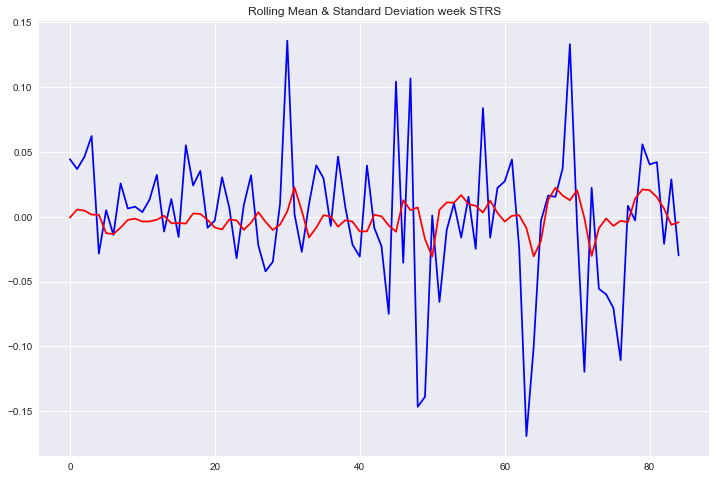

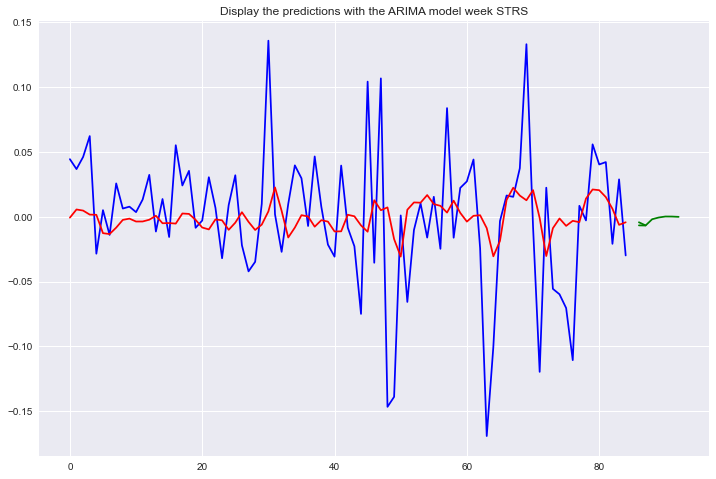

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   85
Model:                 ARIMA(3, 0, 1)   Log Likelihood                 126.257
Date:                Sat, 18 Feb 2023   AIC                           -240.515
Time:                        17:02:44   BIC                           -225.859
Sample:                             0   HQIC                          -234.620
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0083      0.002     -3.577      0.000      -0.013      -0.004
ar.L1          0.8686      0.129      6.736      0.000       0.616       1.121
ar.L2         -0.1202      0.148     -0.815      0.4

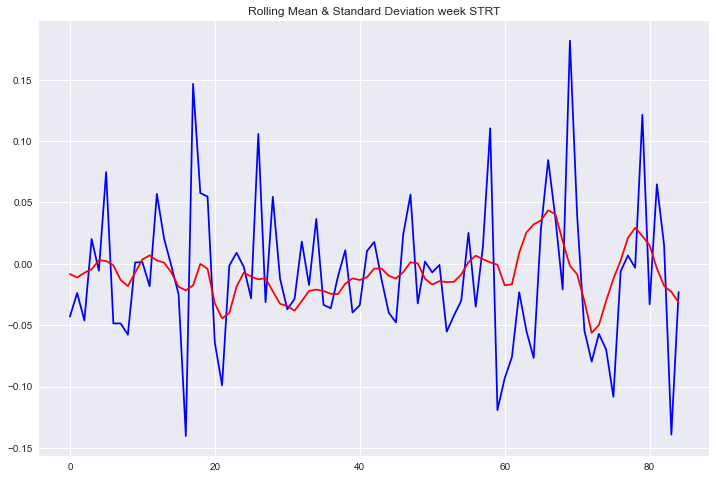

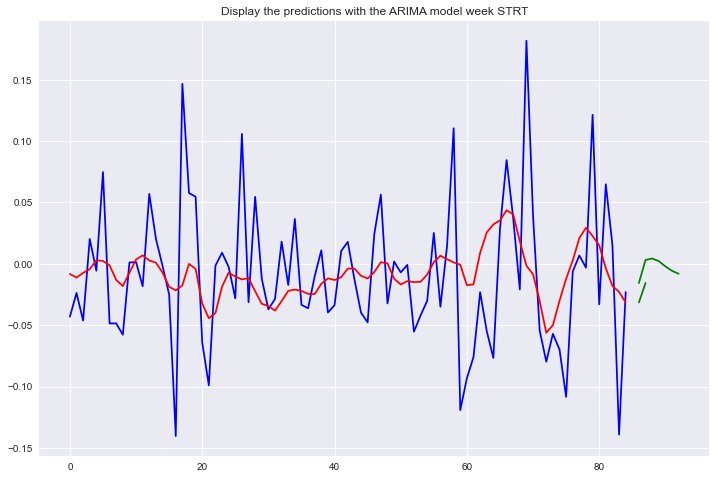

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   85
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  91.861
Date:                Sat, 18 Feb 2023   AIC                           -171.722
Time:                        17:02:45   BIC                           -157.067
Sample:                             0   HQIC                          -165.827
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0198      0.009     -2.308      0.021      -0.037      -0.003
ar.L1          0.1210      0.686      0.177      0.860      -1.223       1.465
ar.L2         -0.0452      0.141     -0.321      0.7

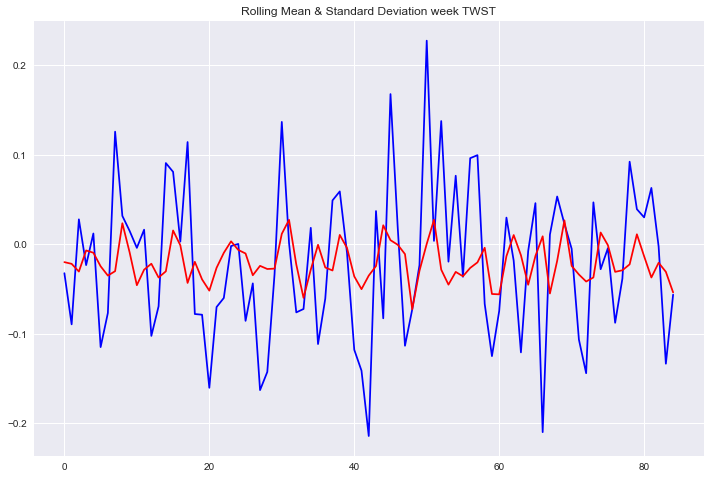

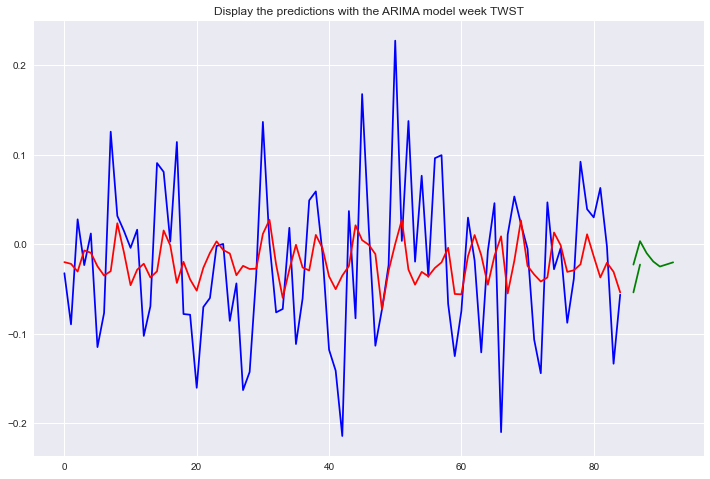

In [55]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA

forcastlist=[]

# the autocorrelation chart provides just the correlation at increasing lags
for h in range(len(udiff.columns)):
    item=udiff.columns.__getitem__(h)
    # Notice that you have to use udiff - the differenced data rather than the original data. 
    # ar1 = # TODO: Fit an ARIMA model to the differenced data
    ar1='{}'.format(item)
    ar1 = ARIMA(udiff[item].values,order=(3,0,1)).fit()
    print(ar1)
    print(ar1.summary())
    
    # TODO: Plot the ARMA fitted values on the same plot as the differenced time series
    plt.figure(figsize=(12,8))
    plt.plot(udiff[item].values,color='blue')
    preds=ar1.fittedvalues
    jo='Rolling Mean & Standard Deviation {}'.format(item)
    plt.title(jo)
    plt.plot(preds,color='red')
    plt.show()
    
    #forecast = # TODO: Use the ARMA model to create a forecast two weeks into the future
    
    steps=7

    forecast=ar1.forecast(steps=steps)
    
    forcastlist.append(forecast)

    plt.figure(figsize=(12, 8))
    plt.plot(udiff[item].values, color='blue')

    preds = ar1.fittedvalues
    plt.plot(preds, color='red')

    plt.plot(pd.DataFrame(np.array([preds[-1],forecast[0]]).T,index=range(len(udiff[item].values)+1, len(udiff[item].values)+3)), color='green')
    plt.plot(pd.DataFrame(forecast,index=range(len(udiff[item].values)+1, len(udiff[item].values)+1+steps)), color='green')
    jos='Display the predictions with the ARIMA model {}'.format(item)
    plt.title(jos)
    plt.show()

In [56]:
udiff.columns

Index(['week AGLE', 'week AGNC', 'week AXON', 'week BSBK', 'week CEAD',
       'week CMRA', 'week CMRX', 'week CVCO', 'week CVCY', 'week FNKO',
       'week FNLC', 'week IFRX', 'week KLXE', 'week NMRD', 'week NMRK',
       'week NVCN', 'week NVCR', 'week NVEC', 'week NVEI', 'week OPTN',
       'week SCOR', 'week SDC', 'week SLAB', 'week STRR', 'week STRS',
       'week STRT', 'week TWST'],
      dtype='object')

week AGLE
           0
86 -0.076921
87 -0.040028
88 -0.033335
89 -0.028766
90 -0.032475
91 -0.031084
92 -0.032710


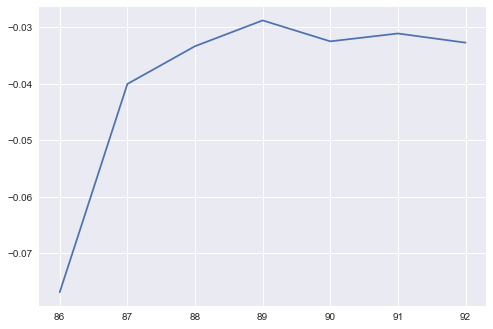

week AGNC
           0
86 -0.004881
87 -0.005067
88 -0.003840
89 -0.003322
90 -0.003088
91 -0.002909
92 -0.002817


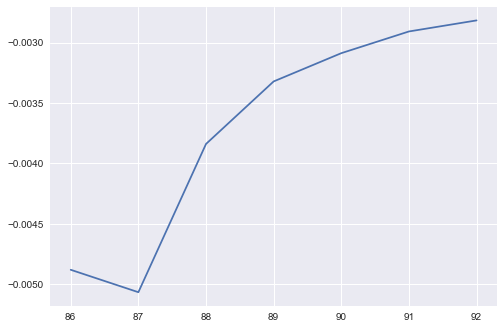

week AXON
           0
86  0.010143
87 -0.000376
88  0.001621
89  0.002157
90  0.001584
91  0.001399
92  0.001401


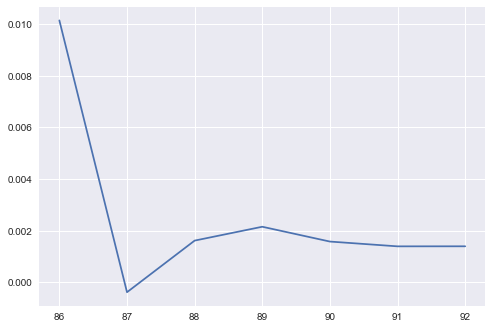

week BSBK
           0
86 -0.001016
87  0.000919
88  0.000461
89  0.000984
90  0.001151
91  0.001131
92  0.001166


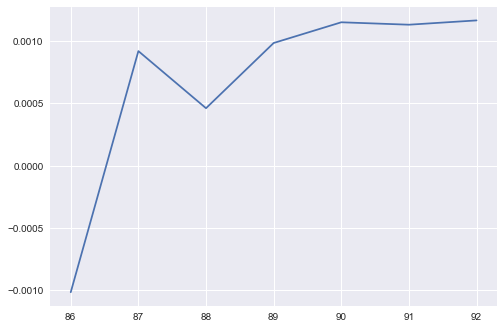

week CEAD
           0
86 -0.070250
87 -0.064529
88 -0.049718
89 -0.035978
90 -0.026067
91 -0.021145
92 -0.020386


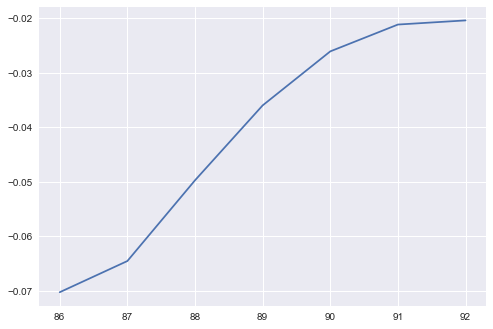

week CMRA
           0
86 -0.033025
87 -0.020546
88 -0.031792
89 -0.017443
90 -0.028684
91 -0.020173
92 -0.028459


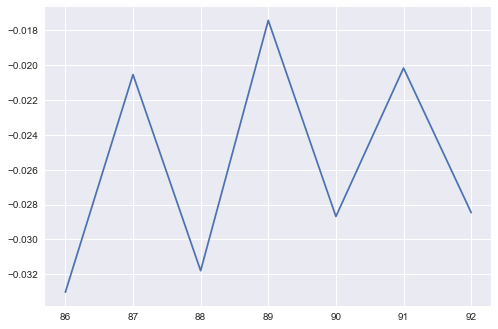

week CMRX
           0
86 -0.025667
87 -0.017435
88 -0.015238
89 -0.019433
90 -0.018014
91 -0.019189
92 -0.018073


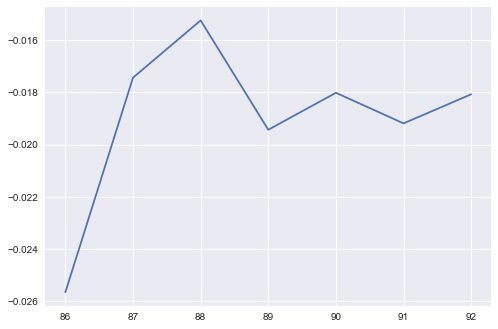

week CVCO
           0
86  0.005090
87 -0.003505
88 -0.000094
89  0.001174
90  0.003089
91  0.003173
92  0.003143


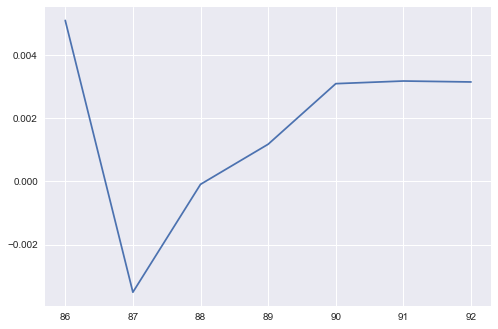

week CVCY
           0
86  0.010603
87  0.007570
88  0.006119
89  0.005058
90  0.004467
91  0.004090
92  0.003865


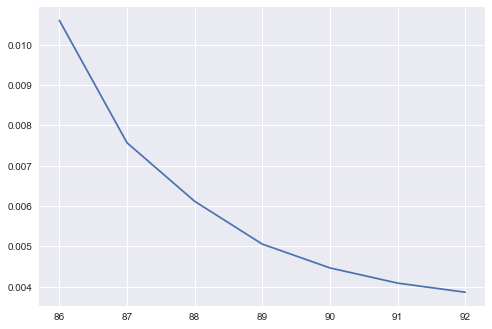

week FNKO
           0
86  0.008359
87 -0.001450
88 -0.011365
89 -0.007959
90 -0.008302
91 -0.006338
92 -0.007712


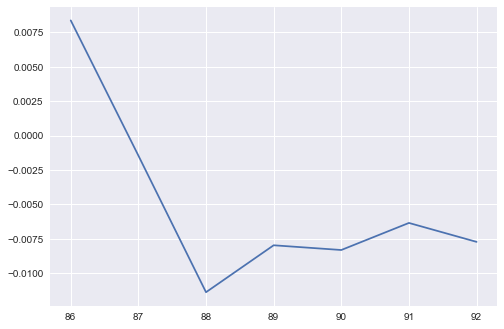

week FNLC
           0
86 -0.000288
87  0.000618
88  0.001612
89  0.001116
90  0.001054
91  0.001010
92  0.001036


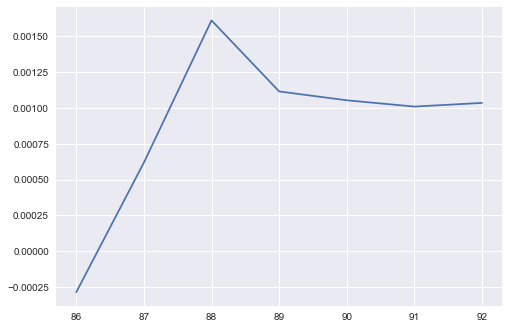

week IFRX
           0
86  0.024655
87 -0.002219
88 -0.010196
89 -0.008046
90 -0.001023
91 -0.001523
92 -0.001175


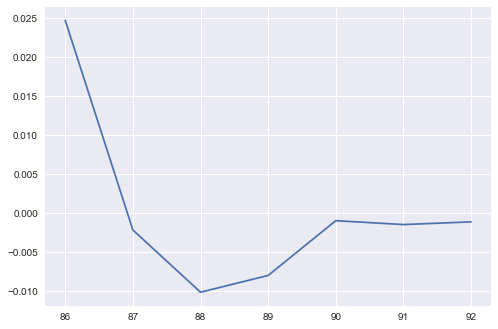

week KLXE
           0
86  0.006833
87  0.029281
88  0.012761
89  0.011044
90  0.004953
91  0.003869
92  0.003191


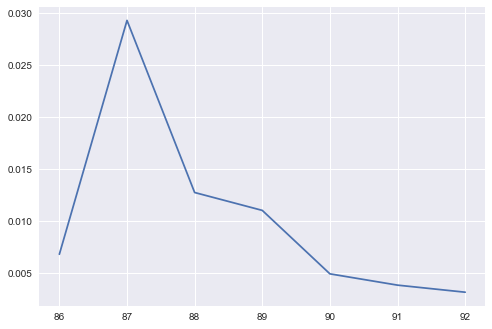

week NMRD
           0
86  0.043565
87  0.030105
88  0.000388
89 -0.018824
90 -0.025473
91 -0.025659
92 -0.024185


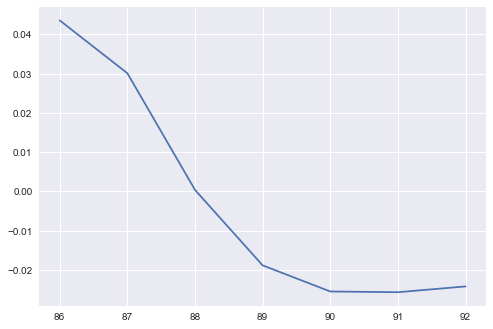

week NMRK
           0
86  0.011280
87 -0.013314
88  0.003064
89 -0.007426
90 -0.002014
91 -0.004649
92 -0.003498


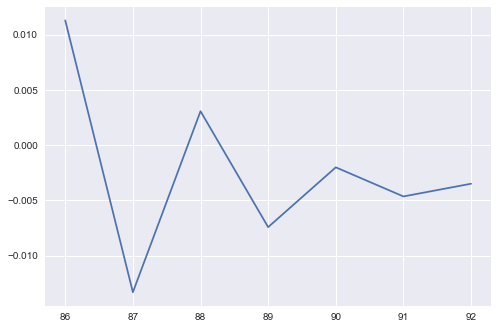

week NVCN
           0
86  0.013992
87  0.011335
88  0.007772
89  0.007492
90  0.006987
91  0.005813
92  0.005100


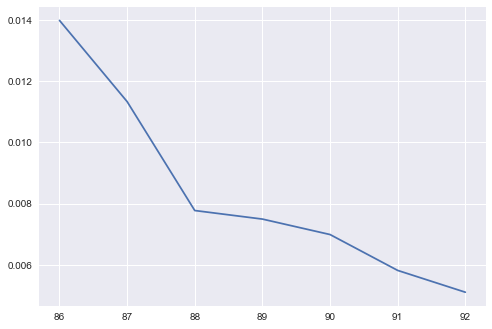

week NVCR
           0
86 -0.012500
87 -0.002925
88 -0.006961
89 -0.011185
90 -0.011465
91 -0.010231
92 -0.009730


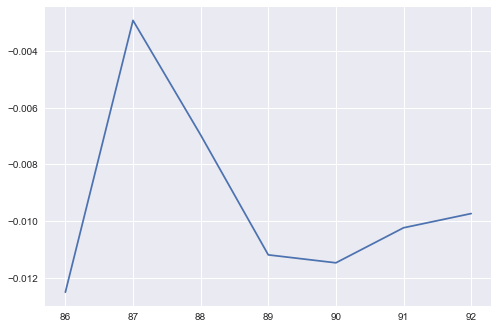

week NVEC
           0
86  0.006920
87  0.004604
88  0.002561
89  0.002439
90  0.002023
91  0.002121
92  0.001991


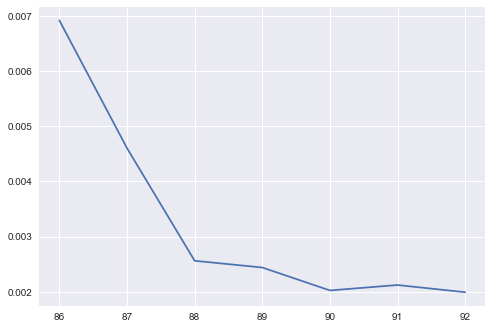

week NVEI
           0
86 -0.016181
87 -0.012685
88 -0.011394
89 -0.010674
90 -0.010625
91 -0.010527
92 -0.010525


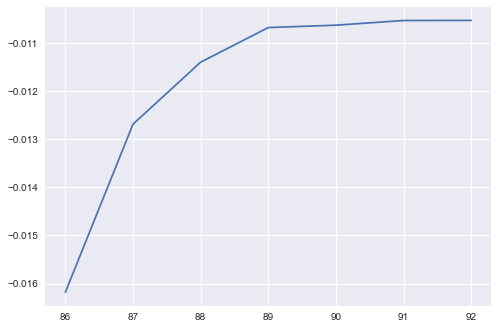

week OPTN
           0
86 -0.007725
87 -0.007823
88 -0.007566
89 -0.007545
90 -0.007538
91 -0.007536
92 -0.007535


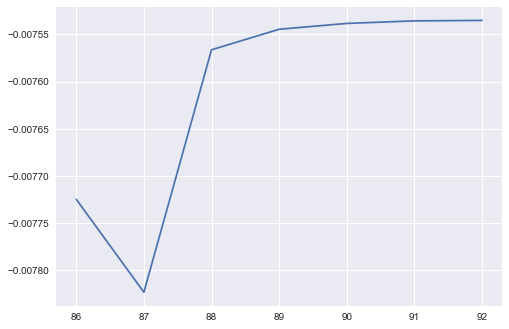

week SCOR
           0
86 -0.025670
87 -0.028795
88 -0.027698
89 -0.024806
90 -0.021786
91 -0.019347
92 -0.017671


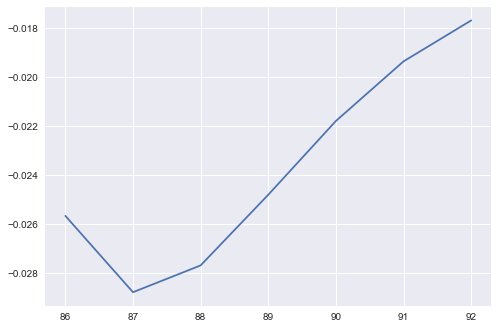

week SDC
           0
86 -0.049726
87 -0.029255
88 -0.033466
89 -0.028838
90 -0.032668
91 -0.030742
92 -0.032102


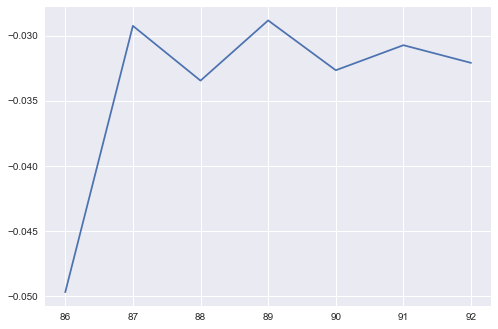

week SLAB
           0
86 -0.009017
87  0.012480
88 -0.004991
89  0.010364
90 -0.002561
91  0.008410
92 -0.000903


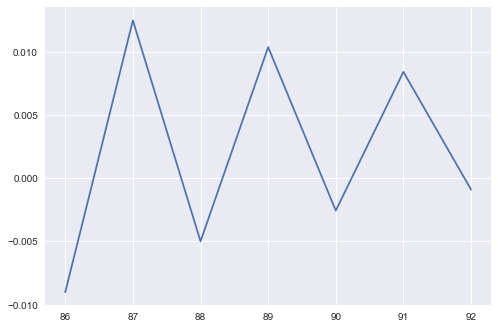

week STRR
           0
86 -0.019114
87 -0.014963
88 -0.012617
89 -0.013333
90 -0.014288
91 -0.015075
92 -0.015352


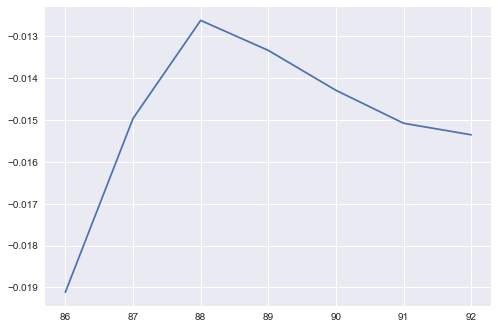

week STRS
           0
86 -0.006668
87 -0.006789
88 -0.001926
89 -0.000579
90  0.000178
91  0.000146
92 -0.000089


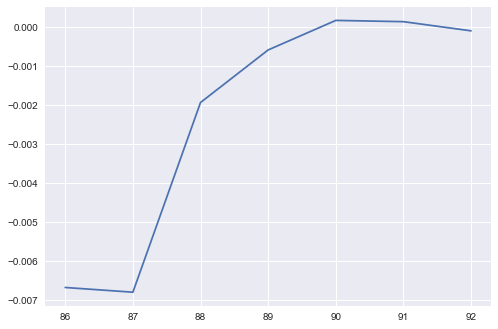

week STRT
           0
86 -0.015627
87  0.003170
88  0.004356
89  0.002215
90 -0.002094
91 -0.005724
92 -0.008097


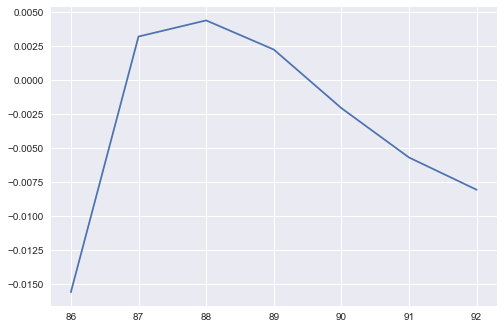

week TWST
           0
86 -0.022598
87  0.003564
88 -0.009814
89 -0.019158
90 -0.024781
91 -0.022433
92 -0.020074


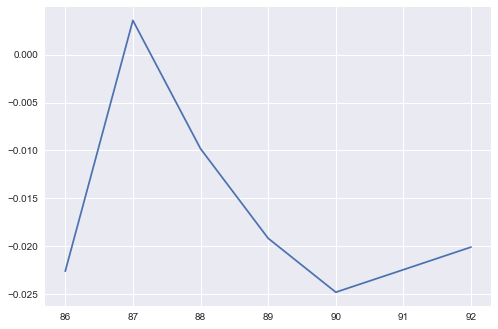

In [57]:
for forc in range(len(udiff.columns)):
    forcr=udiff.columns.__getitem__(forc)
    l=pd.DataFrame(forcastlist[forc],index=range(len(udiff[forcr].values)+1, len(udiff[forcr].values)+1+steps))
    item=udiff.columns.__getitem__(forc)
    # Notice that you have to use udiff - the differenced data rather than the original data. 
    # ar1 = # TODO: Fit an ARIMA model to the differenced data
    ar1='{}'.format(item)
    print(ar1)
    print(l)
    plt.figure()
    plt.plot(l)
    plt.show()

In [58]:
# Queremos quedarnos sólo con aquellas emisoras que se pronostica que vayan a subir significativamente en una semana
listaNASDAQ=[]
for ar in range(len(forcastlist)):
    item2=udiff.columns.__getitem__(ar)
    arnasdaq='{}'.format(item2)
    fi=forcastlist[ar][0]
    fm1=forcastlist[ar][1]
    fm=forcastlist[ar][3]
    ff=forcastlist[ar][6]
    if ff>fi:
        listaNASDAQ.append(item2)
        print('Invierte en: ', arnasdaq)

Invierte en:  week AGLE
Invierte en:  week AGNC
Invierte en:  week BSBK
Invierte en:  week CEAD
Invierte en:  week CMRA
Invierte en:  week CMRX
Invierte en:  week FNLC
Invierte en:  week NVCR
Invierte en:  week NVEI
Invierte en:  week OPTN
Invierte en:  week SCOR
Invierte en:  week SDC
Invierte en:  week SLAB
Invierte en:  week STRR
Invierte en:  week STRS
Invierte en:  week STRT
Invierte en:  week TWST


In [59]:
LISTAEMISORAS_NASDAQ=[]
for i in listaNASDAQ:
    wd = i.split()
    LISTAEMISORAS_NASDAQ.append(wd[1])
LISTAEMISORAS_NASDAQ

['AGLE',
 'AGNC',
 'BSBK',
 'CEAD',
 'CMRA',
 'CMRX',
 'FNLC',
 'NVCR',
 'NVEI',
 'OPTN',
 'SCOR',
 'SDC',
 'SLAB',
 'STRR',
 'STRS',
 'STRT',
 'TWST']

In [60]:
data_final_NASDAQ=pd.DataFrame(LISTAEMISORAS_NASDAQ, columns=['NASDAQ'])
data_final_NASDAQ

NASDAQ
0    AGLE
1    AGNC
2    BSBK
3    CEAD
4    CMRA
5    CMRX
6    FNLC
7    NVCR
8    NVEI
9    OPTN
10   SCOR
11    SDC
12   SLAB
13   STRR
14   STRS
15   STRT
16   TWST

In [61]:
# Enviamos la data a excel
data_final_NASDAQ.to_excel('data_final_NASDAQ.xlsx')